<h1 style="text-align:center;font-weight:bold;font-family:sans-serif">Assignment 05</h1>

#### Name:- Sk Fardeen Hossain
#### Roll No. :- 2021CSB023
#### G-Suite Id:- 2021csb023.sk@students.iiests.ac.in
#### Department:- Computer Science and Technology

## **Question 01**
Download and extract the flower image dataset from https://www.kaggle.com/alxmamaev/flowers-recognition.

In [ ]:
# Download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

path=path+'/flowers'

print("Path to dataset files:", path)

100%|██████████| 225M/225M [00:12<00:00, 19.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alxmamaev/flowers-recognition/versions/2/flowers


In [ ]:
import os

os.listdir(path)

['sunflower', 'daisy', 'rose', 'tulip', 'dandelion']

## **Question 02**
The dataset contains five classes of flower images of variable size namely
chamomile, tulip, rose, sunflower, and dandelion. Resize all images to 80 × 80
pixels and convert all colour images to grey images.

In [ ]:
# Image Parameters
N_CLASSES = 5
IMG_SIZE = 80
DIR=path
FLOWER_DAISY_DIR=path+'/daisy'
FLOWER_SUNFLOWER_DIR=path+'/sunflower'
FLOWER_TULIP_DIR=path+'/tulip'
FLOWER_DANDI_DIR=path+'/dandelion'
FLOWER_ROSE_DIR=path+'/rose'

In [ ]:
X=[]  # Contains the image
Y=[]  # Contains the labels

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
from PIL import Image
import numpy as np

def train_data(flower_type,path_dir):
  for img in tqdm(os.listdir(path_dir)):
        label=flower_type
        path = os.path.join(path_dir,img)
        img_array = Image.open(path).convert('L')
        img_array = img_array.resize((IMG_SIZE,IMG_SIZE))
        img_array = np.array(img_array)
        X.append(np.array(img_array))
        Y.append(str(label))

In [ ]:
train_data('Daisy',FLOWER_DAISY_DIR)
train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
train_data('Tulip',FLOWER_TULIP_DIR)
train_data('Dandelion',FLOWER_DANDI_DIR)
train_data('Rose',FLOWER_ROSE_DIR)

100%|██████████| 784/784 [00:01<00:00, 562.45it/s]


In [ ]:
print(f"The number of samples in the dataset is {len(X)}")

The number of samples in the dataset is 4317


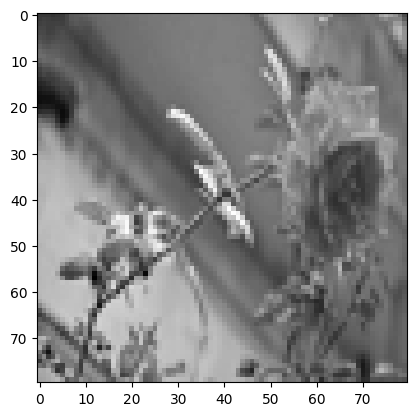

Rose


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[4235],cmap='gray')
plt.show()

print(Y[4235])

## **Question 03**
Randomly shuffle all images to create training, test set with ratio 90: 10,
respectively. (Reduce the training size by 1/5, if computation resources are
limited.)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_rem,y_train,y_rem = train_test_split(X,Y,test_size=0.2,random_state=7)
X_test,X_val,y_test,y_val=train_test_split(X_rem,y_rem,test_size=0.5,random_state=7)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

3453
3453
432
432
432
432


In [ ]:
# Convert to np array for tf processing
X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)
y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

# Reshape
X_train = X_train.reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_val = X_val.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
# One hot encode the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(['Daisy','Sunflower','Tulip','Dandelion','Rose'])

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

import pandas as pd

y_train = pd.get_dummies(y_train,dtype='int').to_numpy()
y_test = pd.get_dummies(y_test,dtype='int').to_numpy()
y_val = pd.get_dummies(y_val,dtype='int').to_numpy()

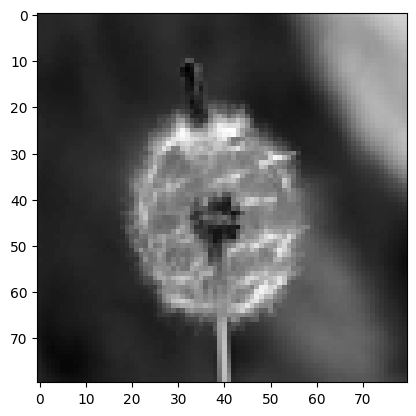

[0 1 0 0 0]


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[135],cmap='gray')
plt.show()

print(y_train[135])

## **Question 04**
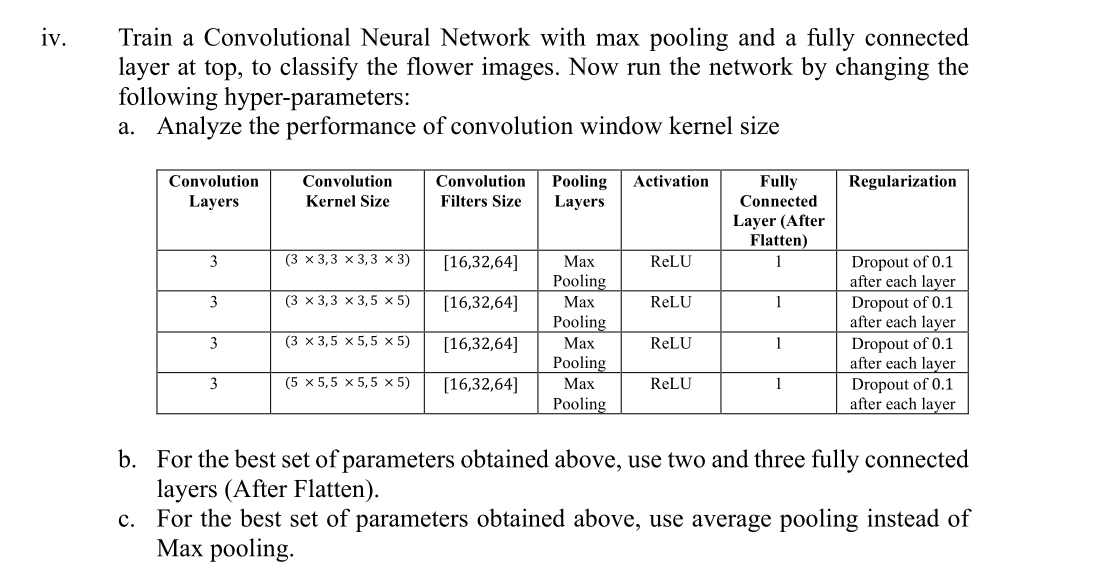

In [ ]:
# Import necessary libraries
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dense, \
                            Dropout, BatchNormalization, LeakyReLU

from tensorflow.keras.metrics import F1Score
from tensorflow.math import confusion_matrix
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# Plot the accuracy and loss metrics of the model

def plot_model_metrics(
    history: 'tf.keras.callbacks.history',
    kernels: 'list(tuple(int,int))',
    filters: 'list(int)',
    activation_func: 'str',
    pool: 'str',
    num_dense_layers: 'int'
):
  plt.plot(history.history['loss'],label='Training loss')
  plt.plot(history.history['val_loss'],label='Validation loss')

  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.title(f"Filters: {filters}, Kernels: {kernels}, {pool} pool, {activation_func} activation function, No. of dense layers after flatten: {num_dense_layers}")

  plt.show()

  plt.plot(history.history['accuracy'],label='Training accuracy')
  plt.plot(history.history['val_accuracy'],label='Validation accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.title(f"Filters: {filters}, Kernels: {kernels}, {pool} pool, {activation_func} activation function, No. of dense layers after flatten: {num_dense_layers}")

  plt.show()

In [ ]:
# Plot the confusion matrix of the model
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(
  y_test: 'list(int)',
  y_pred: 'list(int)'
):
  matrix = confusion_matrix(y_test,y_pred)
 # matrix = matrix.numpy()
  disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=label_encoder.classes_)
  disp.plot(cmap=plt.cm.Blues)
  plt.title("Confusion Matrix for the above model")
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

def plot_confusion_matrix_mnist(y_test, y_pred):
  """Plots the confusion matrix for the given true and predicted labels, normalised"""
  label_encoder = LabelEncoder()
  label_encoder.fit(np.unique(np.concatenate((y_test, y_pred))))
  matrix = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
  matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                display_labels=label_encoder.classes_)
  disp.plot(cmap=plt.cm.Blues,
            xticks_rotation='vertical',
            include_values=True,
            values_format=".2f"
           )
  plt.title("Confusion Matrix for the above model")
  plt.tight_layout()
  plt.show()

In [ ]:
# Train the model

import time

def train_model(
    kernels: 'list(tuple(int,int))',
    filters: 'list(int)',
    activation_func:'str',
    pool: 'str',
    dropout_rate: 'float',
    num_dense_layers: 'int',
    X_train: 'numpy.array',
    y_train: 'numpy.array',
    X_test: 'numpy.array',
    y_test: 'numpy.array',
    add_batch_normalization=False,
    flatten_layer_size=64,
    num_epochs = 100,
    extra_conv_layers=0,
    is_rgb=False,
    is_mnist=False
):

  model = Sequential()
  input_shape=(80,80,1)
  num_classes=5
  val_data=(X_val,y_val)
  if is_rgb:
    input_shape=(80,80,3)
    val_data=(X_val_rgb,y_val_rgb)
  if is_mnist:
    num_classes=10
  for filter,kernel in zip(filters,kernels):
    if activation_func=='leaky_relu':
      model.add(Conv2D(
          filters=filter,
          kernel_size=kernel,
          activation=LeakyReLU(alpha=0.01)
          ))
    else:
      model.add(Conv2D(
          filters=filter,
          kernel_size=kernel,
          activation=activation_func
          ))

    if pool=='max':
      model.add(MaxPool2D())
    else:
      model.add(AveragePooling2D(pool_size=(2,2)))

    if add_batch_normalization:
      model.add(BatchNormalization())

    if dropout_rate>0:
      model.add(Dropout(rate=dropout_rate))

    # Extra Conv Layers
    for i in range(0,extra_conv_layers):
      filters.append(filters[-1]*2)
      kernels.append(kernels[-1])
      if activation_func=='leaky_relu':
        model.add(Conv2D(
            filters=filters[-1],
            kernel_size=kernels[-1],
            activation=LeakyReLU(alpha=0.01),
            padding='valid'
            ))
      else:
        model.add(Conv2D(
            filters=filters[-1],
            kernel_size=kernels[-1],
            activation=activation_func,
            padding='valid'
            ))

    model.add(Flatten())

    for i in range(num_dense_layers):
      if activation_func=='leaky_relu':
        model.add(Dense(
            units=flatten_layer_size,
            activation=LeakyReLU(alpha=0.01)
            ))
      else:
        model.add(Dense(
            units=flatten_layer_size,
            activation=activation_func
        ))

    model.add(Dense(units=num_classes,activation='softmax'))

    model.summary()

    model.compile(
                optimizer=Adam(learning_rate=0.002),
                loss=CategoricalCrossentropy,
                metrics=['accuracy',F1Score(average='weighted')]
                )

    callback = [
        EarlyStopping(
            monitor = 'val_loss',
            patience = 10,
            restore_best_weights=True
        )
    ]

    start_time = time.time()

    history = model.fit(
        x=X_train,
        y=y_train,
        epochs=num_epochs,
        validation_data=val_data,
        callbacks=callback
    )

    end_time = time.time()

    train_time=end_time-start_time

    test_loss, test_accuracy ,test_f1 = model.evaluate(X_test,y_test)

    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test F1 Score: {test_f1}")

    print(f"Time required to train the model is {train_time} seconds")

    plot_model_metrics(
        history=history,
        kernels=kernels,
        filters=filters,
        activation_func=activation_func,
        pool=pool,
        num_dense_layers=num_dense_layers
    )

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred,axis=1)
    y_true_classes = np.argmax(y_test,axis=1)

    if is_mnist:
      plot_confusion_matrix_mnist(
        y_test=y_true_classes,
        y_pred=y_pred_classes
      )
    else:
      plot_confusion_matrix(
        y_test=y_true_classes,
        y_pred=y_pred_classes
      )

    return test_loss,test_accuracy,test_f1,train_time,model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         121,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,845 (475.96 KB)

 Trainable params: 121,845 (475.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.2377 - f1_score: 0.2347 - loss: 233.4431 - val_accuracy: 0.2477 - val_f1_score: 0.2424 - val_loss: 4.1256
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.4580 - f1_score: 0.4575 - loss: 1.9968 - val_accuracy: 0.2847 - val_f1_score: 0.2793 - val_loss: 3.5507
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.6470 - f1_score: 0.6464 - loss: 0.9763 - val_accuracy: 0.2870 - val_f1_score: 0.2894 - val_loss: 3.4204
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.7677 - f1_score: 0.7674 - loss: 0.6549 - val_accuracy: 0.3056 - val_f1_score: 0.2988 - val_loss: 3.6281
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.8737 - f1_score: 0.8738 - loss: 0.4159 - val_accuracy: 0.3148 - val_f1_score: 0.3075 - val_loss: 3.8635
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.8997 - f1_score: 0.8999 - loss: 0.3422 - val_accuracy: 0.3079 - val_

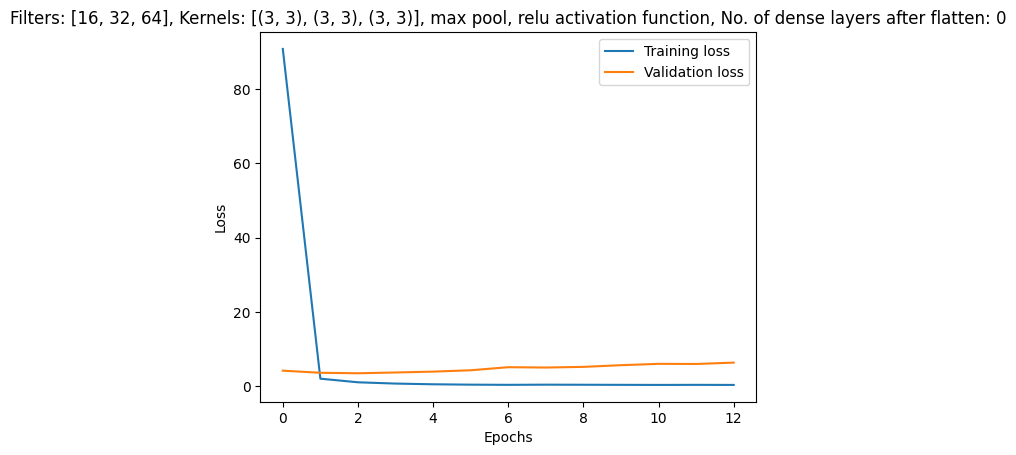

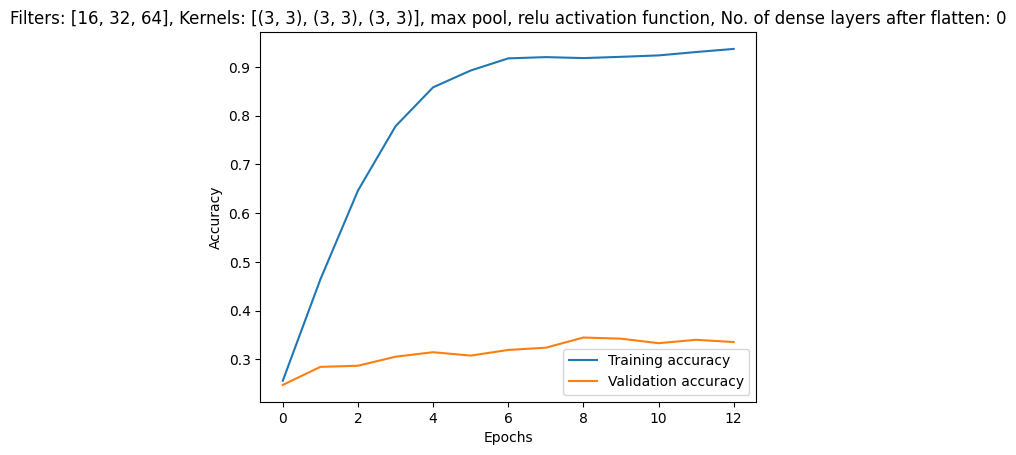

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


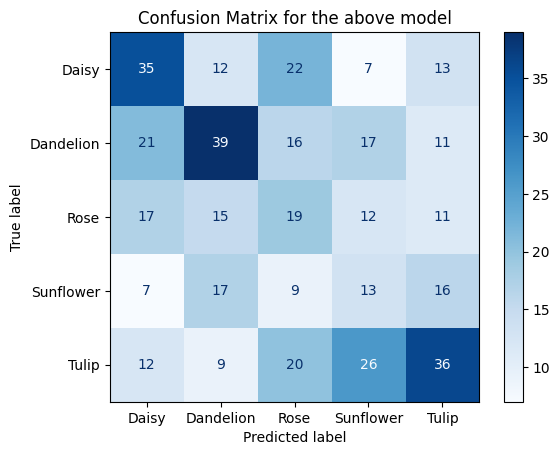

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │         121,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,845 (475.96 KB)

 Trainable params: 121,845 (475.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2314 - f1_score: 0.2294 - loss: 237.6128 - val_accuracy: 0.2847 - val_f1_score: 0.2807 - val_loss: 3.0241
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.4779 - f1_score: 0.4776 - loss: 1.6270 - val_accuracy: 0.3056 - val_f1_score: 0.3026 - val_loss: 2.8588
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.6713 - f1_score: 0.6697 - loss: 0.8670 - val_accuracy: 0.3310 - val_f1_score: 0.3266 - val_loss: 2.7278
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.8005 - f1_score: 0.8005 - loss: 0.5713 - val_accuracy: 0.3241 - val_f1_score: 0.3199 - val_loss: 3.0708
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.8475 - f1_score: 0.8482 - loss: 0.4564 - val_accuracy: 0.3519 - val_f1_score: 0.3450 - val_loss: 3.3716
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.8912 - f1_score: 0.8917 - loss: 0.3845 - val_accuracy: 0.3495 - val

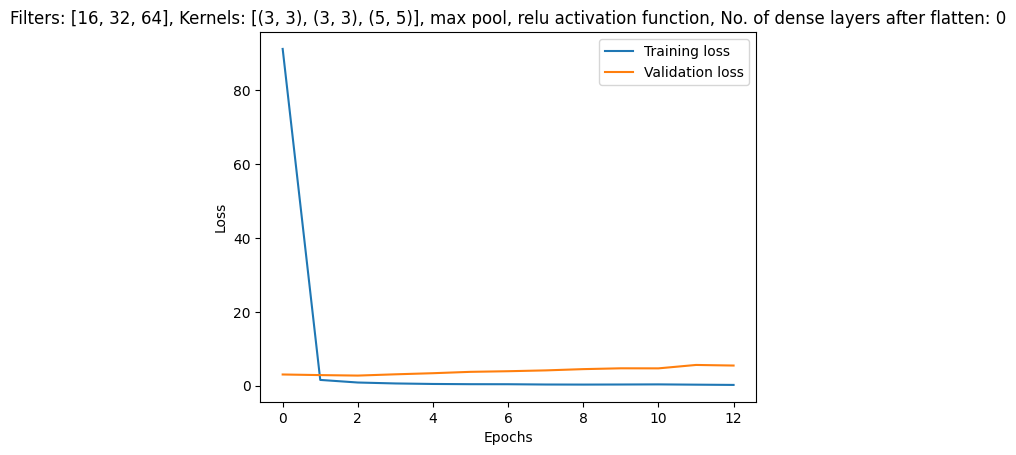

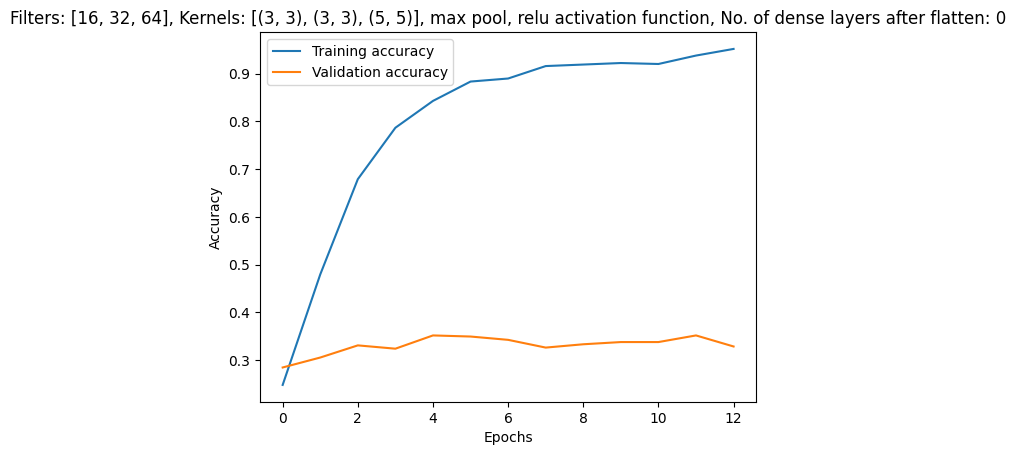

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


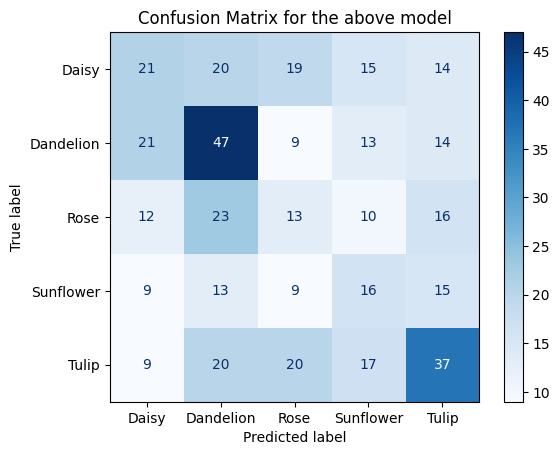

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │         121,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,845 (475.96 KB)

 Trainable params: 121,845 (475.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.2521 - f1_score: 0.2503 - loss: 492.9043 - val_accuracy: 0.3102 - val_f1_score: 0.2516 - val_loss: 8.3644
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.4321 - f1_score: 0.4323 - loss: 4.2141 - val_accuracy: 0.3380 - val_f1_score: 0.3099 - val_loss: 3.6129
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.6363 - f1_score: 0.6363 - loss: 1.1693 - val_accuracy: 0.3542 - val_f1_score: 0.3352 - val_loss: 3.7134
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.7514 - f1_score: 0.7510 - loss: 0.6698 - val_accuracy: 0.3495 - val_f1_score: 0.3391 - val_loss: 3.6550
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.8293 - f1_score: 0.8293 - loss: 0.4588 - val_accuracy: 0.3519 - val_f1_score: 0.3455 - val_loss: 3.8674
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8783 - f1_score: 0.8784 - loss: 0.3393 - val_accuracy: 0.3519 - val

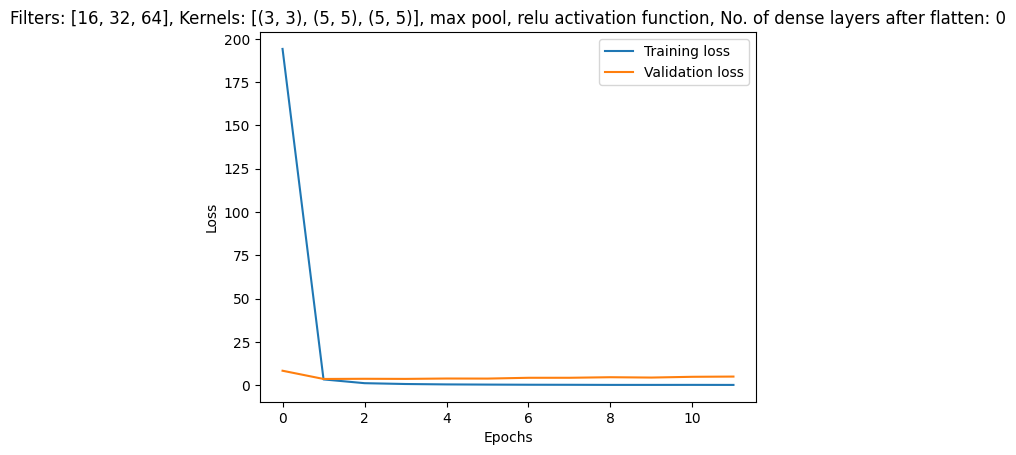

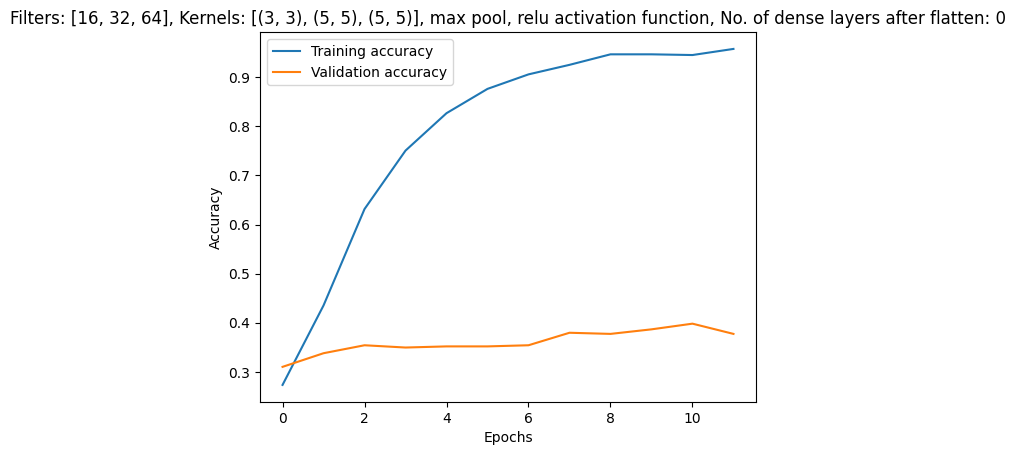

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


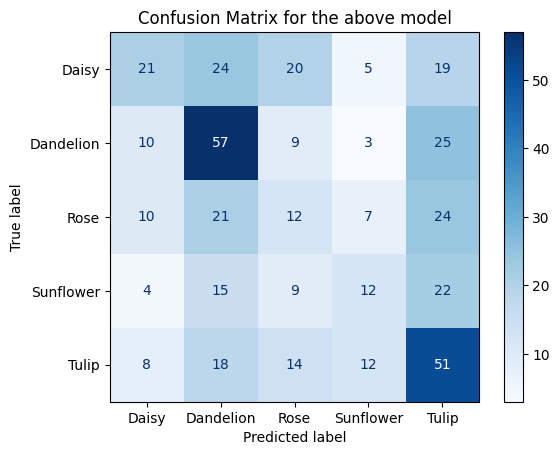

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 76, 76, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 38, 38, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 38, 38, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 23104)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │         115,525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,941 (452.89 KB)

 Trainable params: 115,941 (452.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.2181 - f1_score: 0.2116 - loss: 204.3684 - val_accuracy: 0.2407 - val_f1_score: 0.2167 - val_loss: 1.7584
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.3308 - f1_score: 0.3152 - loss: 1.4987 - val_accuracy: 0.2639 - val_f1_score: 0.2283 - val_loss: 1.8946
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.4827 - f1_score: 0.4761 - loss: 1.2595 - val_accuracy: 0.2731 - val_f1_score: 0.2455 - val_loss: 2.0592
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.5538 - f1_score: 0.5586 - loss: 1.0850 - val_accuracy: 0.2894 - val_f1_score: 0.2590 - val_loss: 2.2781
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.6392 - f1_score: 0.6459 - loss: 0.9273 - val_accuracy: 0.3056 - val_f1_score: 0.2865 - val_loss: 2.4814
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.7011 - f1_score: 0.7072 - loss: 0.8249 - val_accuracy: 0.2569 - 

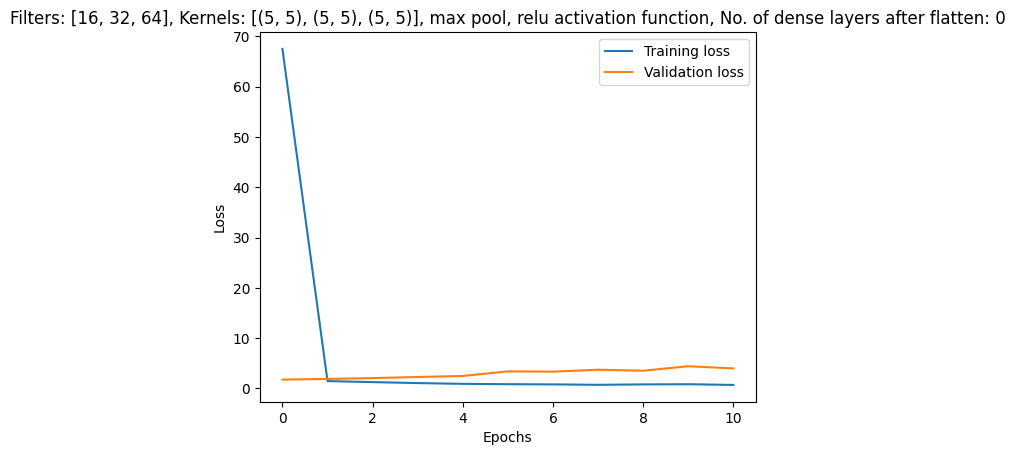

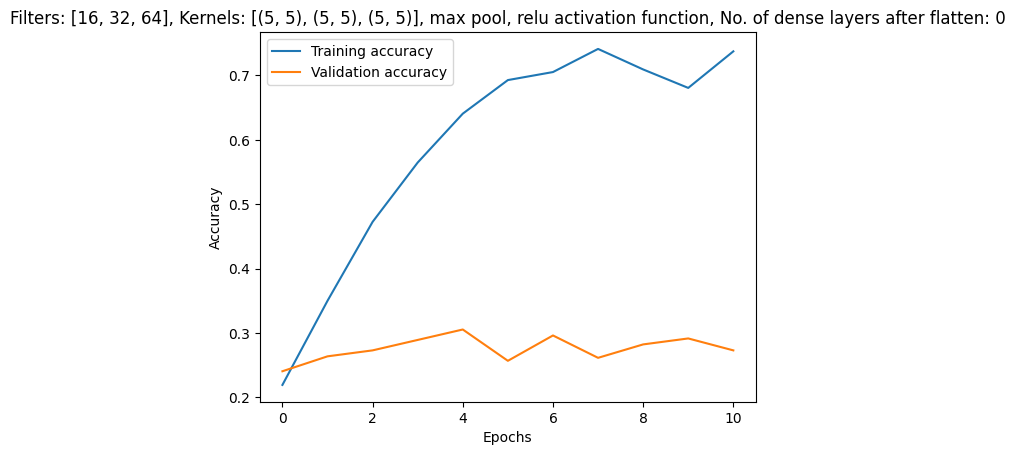

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


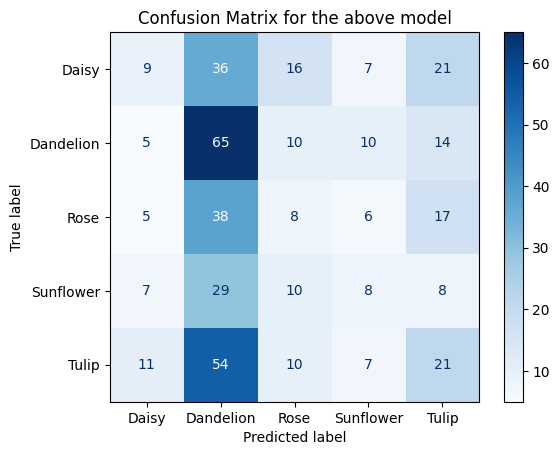

In [ ]:
result_df_1 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Training Time(in seconds)'
    ]
)

kernels = [
    [(3,3),(3,3),(3,3)],
    [(3,3),(3,3),(5,5)],
    [(3,3),(5,5),(5,5)],
    [(5,5),(5,5),(5,5)]
]

filters = [16,32,64]
activation='relu'
dropout_rate = 0.1
num_dense_layers = 0
pool='max'
epochs = 20

for kernel in kernels:
  test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=kernel,
      filters=filters,
      activation_func=activation,
      pool=pool,
      dropout_rate=dropout_rate,
      num_dense_layers=num_dense_layers,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs
  )

  result_df_1.loc[len(result_df_1.index)]=[
      kernel,
      filters,
      pool,
      activation,
      num_dense_layers,
      dropout_rate,
      test_loss,
      test_accuracy,
      test_f1,
      train_time
  ]

In [ ]:
result_df_1

Conv Kernel Size Conv Filter Size Pooling Layers  \
0  [(3, 3), (3, 3), (3, 3)]     [16, 32, 64]            max   
1  [(3, 3), (3, 3), (5, 5)]     [16, 32, 64]            max   
2  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
3  [(5, 5), (5, 5), (5, 5)]     [16, 32, 64]            max   

  Activation Function  No. of Dense Layers after Flatten  Dropout Rate  \
0                relu                                  0           0.1   
1                relu                                  0           0.1   
2                relu                                  0           0.1   
3                relu                                  0           0.1   

   Test Loss  Test Accuracy  Test F1 Score  Training Time(in seconds)  
0   3.092764       0.328704       0.333751                 197.246979  
1   2.864557       0.310185       0.307554                 198.438426  
2   3.545903       0.354167       0.339329                 187.319552  
3   1.712801       0.256944       0.224230                 189.060187

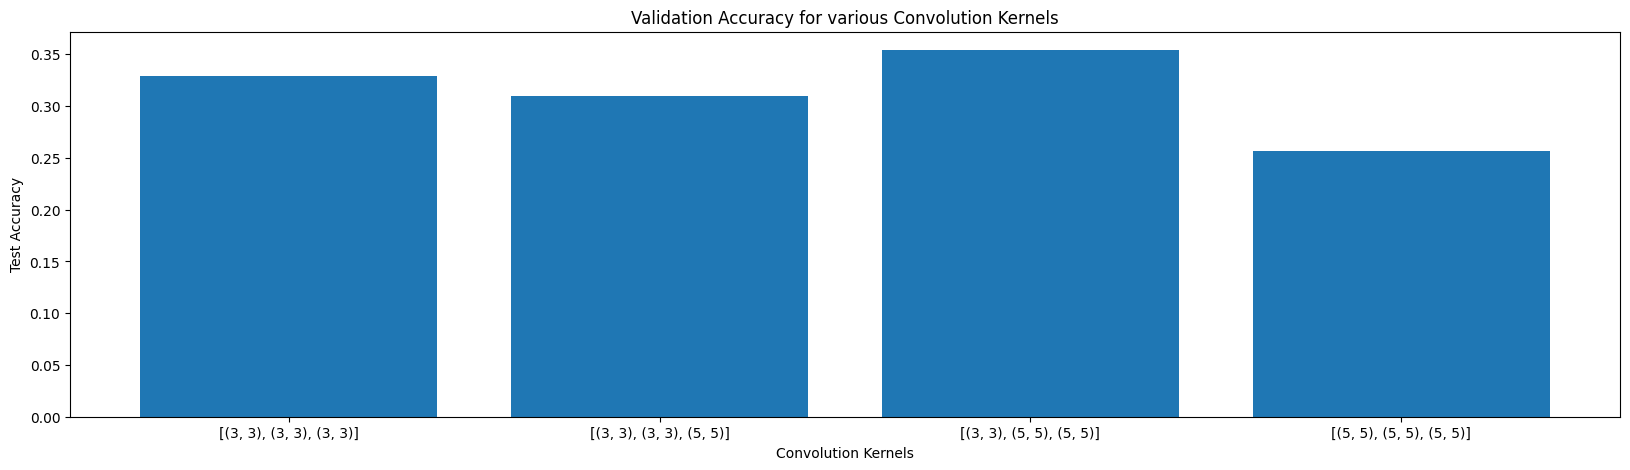

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(
    [str(ker) for ker in result_df_1['Conv Kernel Size']],
    result_df_1['Test Accuracy']
)

plt.ylabel('Test Accuracy')
plt.xlabel('Convolution Kernels')
plt.title('Validation Accuracy for various Convolution Kernels')
plt.show()

In [ ]:
best_kernel = result_df_1.sort_values(
    by=['Test Accuracy','Test F1 Score'],
    ascending=[False,False]
)['Conv Kernel Size'].iloc[0]

best_kernel

[(3, 3), (5, 5), (5, 5)]

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,558,053 (5.94 MB)

 Trainable params: 1,558,053 (5.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.2455 - f1_score: 0.2424 - loss: 128.6618 - val_accuracy: 0.3148 - val_f1_score: 0.3127 - val_loss: 2.3806
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.5185 - f1_score: 0.5174 - loss: 1.2598 - val_accuracy: 0.3102 - val_f1_score: 0.3035 - val_loss: 2.3428
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.7168 - f1_score: 0.7161 - loss: 0.8011 - val_accuracy: 0.3449 - val_f1_score: 0.3353 - val_loss: 2.6991
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.8022 - f1_score: 0.8019 - loss: 0.6054 - val_accuracy: 0.3657 - val_f1_score: 0.3575 - val_loss: 3.0422
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.8647 - f1_score: 0.8642 - loss: 0.4511 - val_accuracy: 0.3657 - val_f1_score: 0.3642 - val_loss: 3.3770
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8922 - f1_score: 0.8918 - loss: 0.3890 - val_accuracy: 0.3634 - 

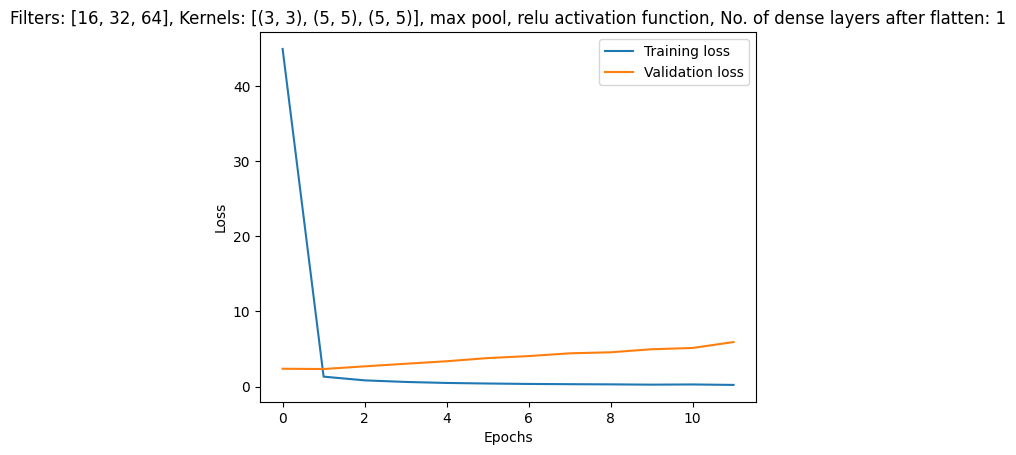

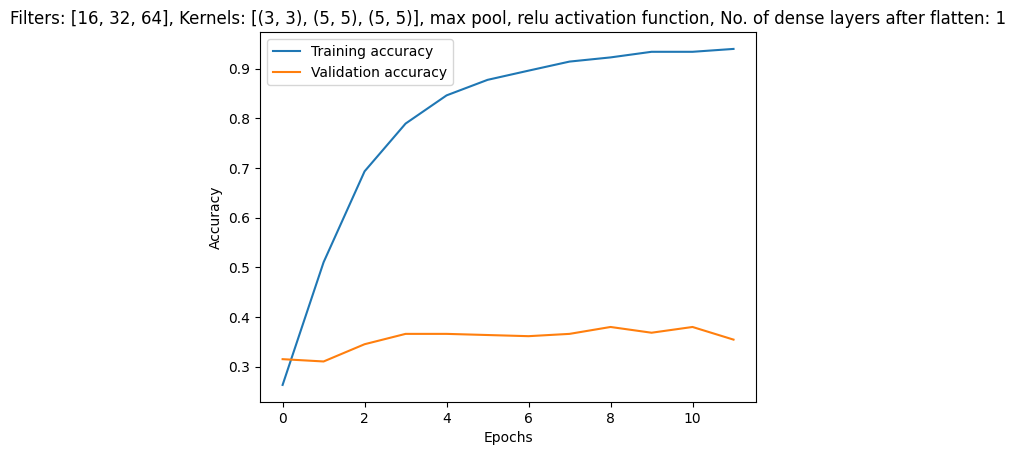

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


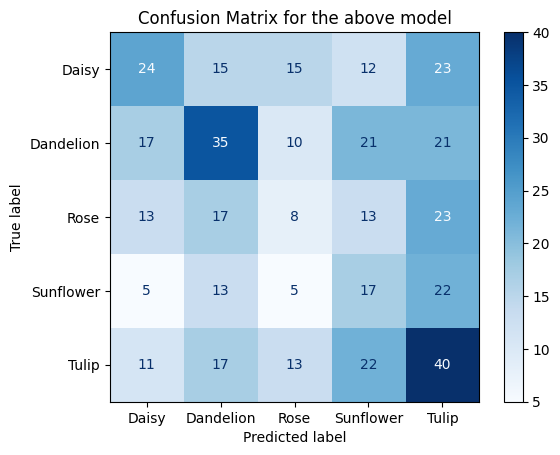

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.2392 - f1_score: 0.2377 - loss: 159.1355 - val_accuracy: 0.3727 - val_f1_score: 0.3513 - val_loss: 1.9389
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.4622 - f1_score: 0.4577 - loss: 1.3670 - val_accuracy: 0.3866 - val_f1_score: 0.3790 - val_loss: 1.8688
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.6879 - f1_score: 0.6870 - loss: 0.8206 - val_accuracy: 0.3843 - val_f1_score: 0.3855 - val_loss: 2.0543
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.7927 - f1_score: 0.7936 - loss: 0.5902 - val_accuracy: 0.3611 - val_f1_score: 0.3582 - val_loss: 2.4087
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.8671 - f1_score: 0.8675 - loss: 0.4360 - val_accuracy: 0.3681 - val_f1_score: 0.3527 - val_loss: 2.7063
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.9006 - f1_score: 0.9011 - loss: 0.3367 - val_accuracy: 0.3843 - 

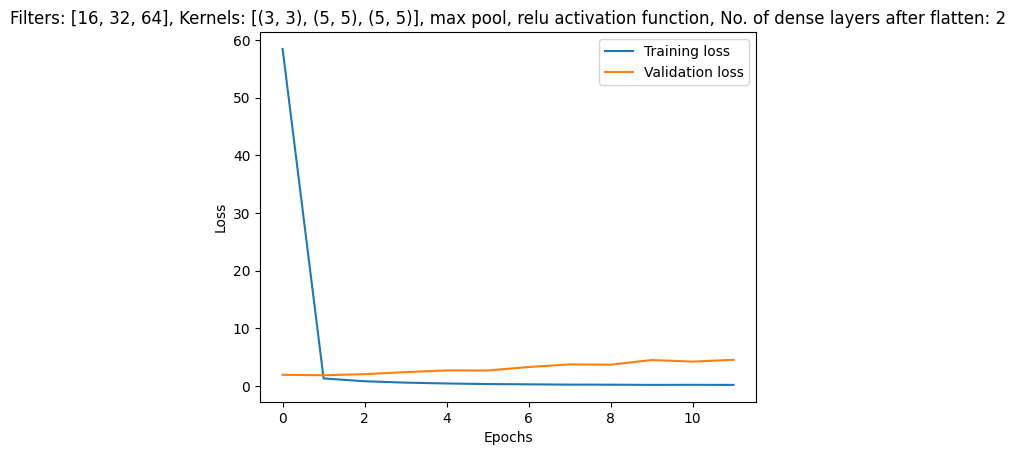

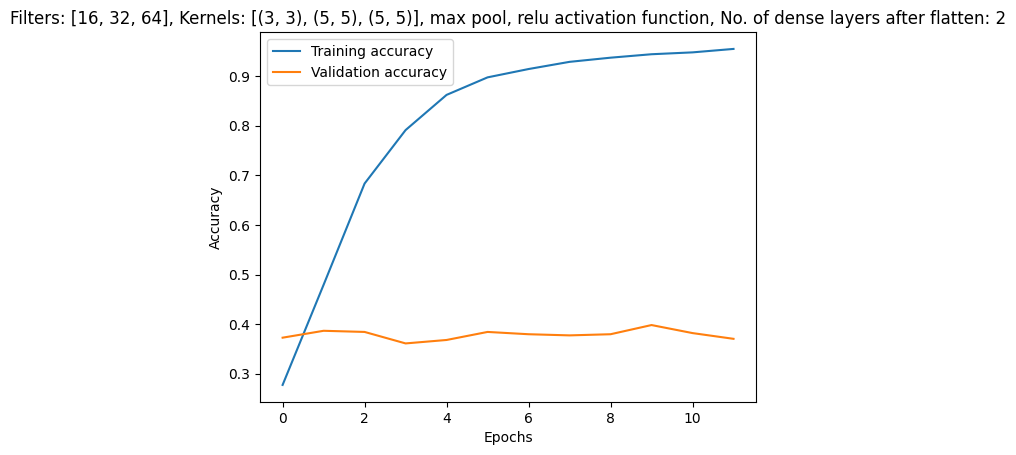

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


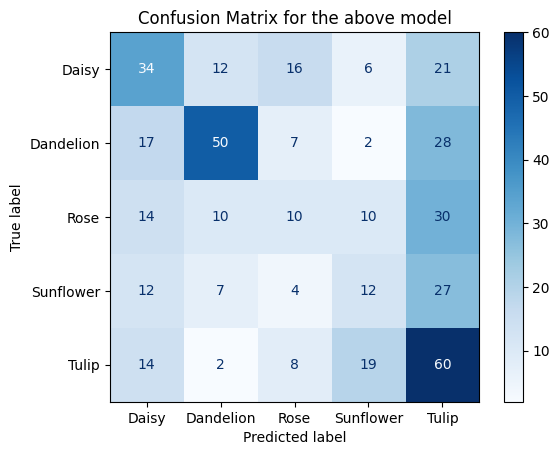

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,566,373 (5.98 MB)

 Trainable params: 1,566,373 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.2292 - f1_score: 0.2270 - loss: 110.7956 - val_accuracy: 0.2917 - val_f1_score: 0.2805 - val_loss: 1.8010
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.4593 - f1_score: 0.4495 - loss: 1.3546 - val_accuracy: 0.3125 - val_f1_score: 0.2987 - val_loss: 1.7974
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.6648 - f1_score: 0.6635 - loss: 0.9455 - val_accuracy: 0.3935 - val_f1_score: 0.3877 - val_loss: 1.8300
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.7984 - f1_score: 0.8000 - loss: 0.6543 - val_accuracy: 0.3750 - val_f1_score: 0.3600 - val_loss: 2.0824
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.8577 - f1_score: 0.8576 - loss: 0.4979 - val_accuracy: 0.3843 - val_f1_score: 0.3739 - val_loss: 2.2979
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.8861 - f1_score: 0.8868 - loss: 0.4069 - val_accuracy: 0.4051 - 

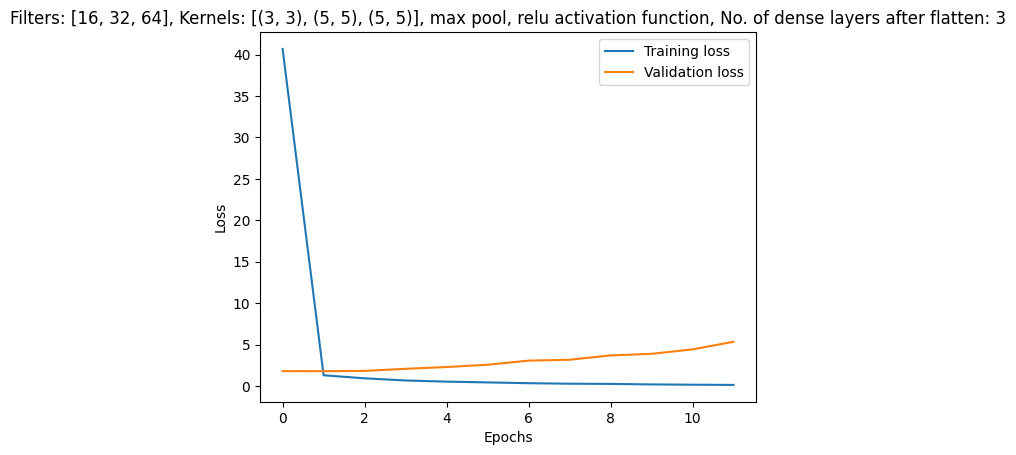

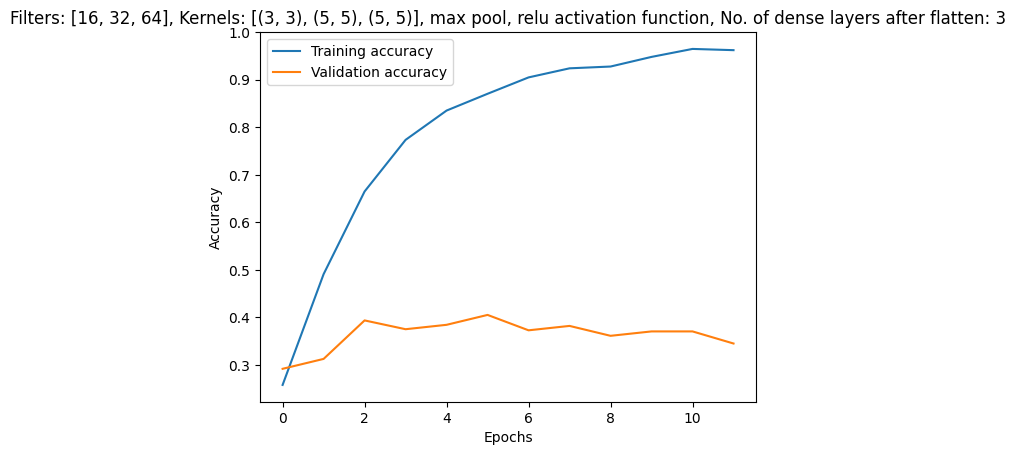

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


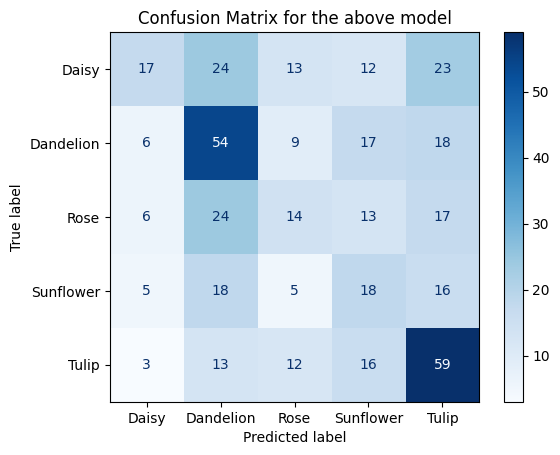

In [ ]:
## Subtask 2

result_df_2 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Training Time(in seconds)'
    ]
)

filters = [16,32,64]
activation='relu'
dropout_rate = 0.1
pool='max'
epochs = 20
num_dense_layers = [1,2,3]

for layer in num_dense_layers:
  test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=best_kernel,
      filters=filters,
      activation_func=activation,
      pool=pool,
      dropout_rate=dropout_rate,
      num_dense_layers=layer,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs
      )

  result_df_2.loc[len(result_df_2.index)]=[
      best_kernel,
      filters,
      pool,
      activation,
      layer,
      dropout_rate,
      test_loss,
      test_accuracy,
      test_f1,
      train_time
  ]

In [ ]:
result_df_2

Conv Kernel Size Conv Filter Size Pooling Layers  \
0  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
1  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
2  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   

  Activation Function  No. of Dense Layers after Flatten  Dropout Rate  \
0                relu                                  1           0.1   
1                relu                                  2           0.1   
2                relu                                  3           0.1   

   Test Loss  Test Accuracy  Test F1 Score  Training Time(in seconds)  
0   2.231380       0.287037       0.283371                 208.502897  
1   1.812790       0.384259       0.374141                 217.480435  
2   1.711645       0.375000       0.359716                 219.300192

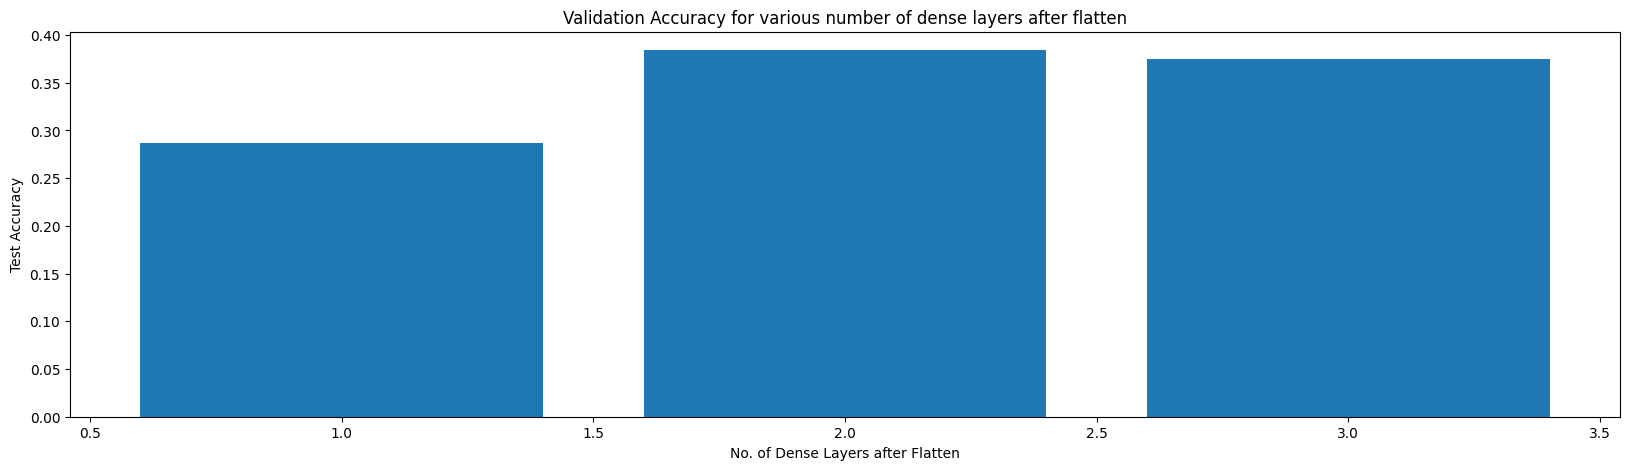

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(
    result_df_2['No. of Dense Layers after Flatten'],
    result_df_2['Test Accuracy']
)

plt.ylabel('Test Accuracy')
plt.xlabel('No. of Dense Layers after Flatten')
plt.title('Validation Accuracy for various number of dense layers after flatten')
plt.show()

In [ ]:
best_num_dense = result_df_2.sort_values(
    by=['Test Accuracy','Test F1 Score'],
    ascending=[False,False]
)['No. of Dense Layers after Flatten'].iloc[0]

best_num_dense

2

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - accuracy: 0.2427 - f1_score: 0.2378 - loss: 160.6646 - val_accuracy: 0.3449 - val_f1_score: 0.3434 - val_loss: 1.8507
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.4452 - f1_score: 0.4431 - loss: 1.4091 - val_accuracy: 0.3472 - val_f1_score: 0.3418 - val_loss: 1.7605
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 153ms/step - accuracy: 0.6456 - f1_score: 0.6436 - loss: 1.0002 - val_accuracy: 0.3912 - val_f1_score: 0.3755 - val_loss: 1.9199
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.7856 - f1_score: 0.7845 - loss: 0.6875 - val_accuracy: 0.3750 - val_f1_score: 0.3702 - val_loss: 2.2030
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.8581 - f1_score: 0.8585 - loss: 0.4827 - val_accuracy: 0.3773 - val_f1_score: 0.3655 - val_loss: 2.6122
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9084 - f1_score: 0.9088 - loss: 0.3535 - val_accuracy: 0.4028 - 

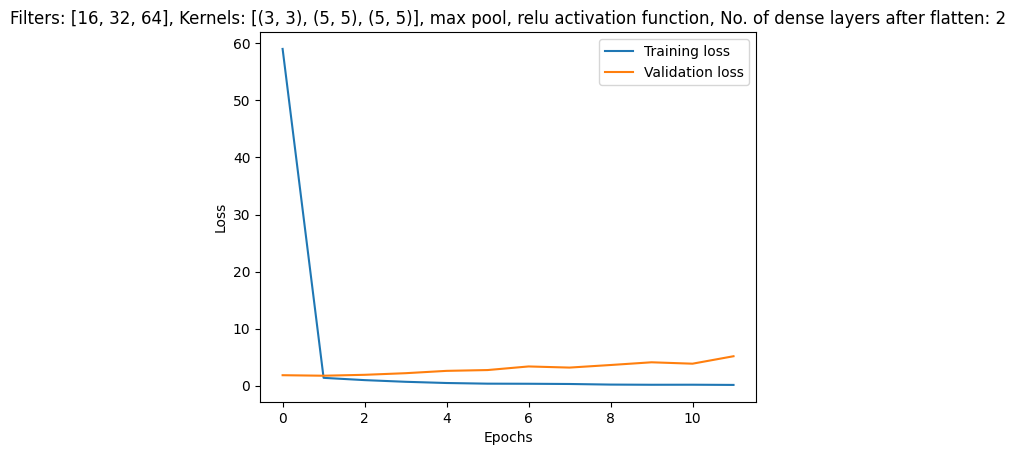

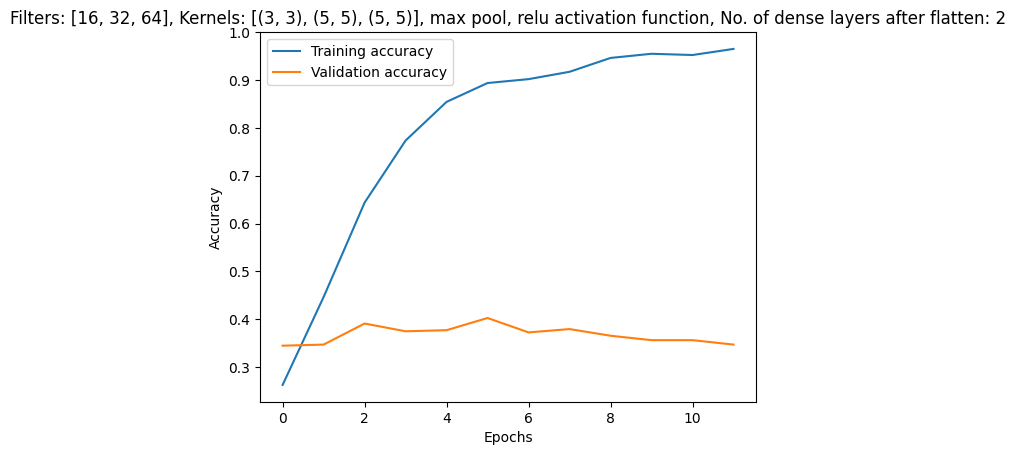

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


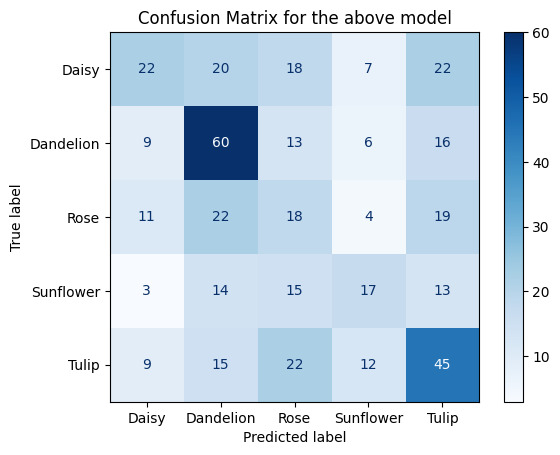

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.2262 - f1_score: 0.2208 - loss: 61.0823 - val_accuracy: 0.2963 - val_f1_score: 0.2594 - val_loss: 1.5667
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.3516 - f1_score: 0.3497 - loss: 1.4920 - val_accuracy: 0.3588 - val_f1_score: 0.3571 - val_loss: 1.5527
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.4960 - f1_score: 0.4950 - loss: 1.2497 - val_accuracy: 0.3843 - val_f1_score: 0.3794 - val_loss: 1.6961
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.6142 - f1_score: 0.6156 - loss: 1.0053 - val_accuracy: 0.3681 - val_f1_score: 0.3668 - val_loss: 1.7546
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.7288 - f1_score: 0.7291 - loss: 0.7755 - val_accuracy: 0.3866 - val_f1_score: 0.3760 - val_loss: 2.1521
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.8187 - f1_score: 0.8197 - loss: 0.5467 - val_accuracy: 0.3727 - v

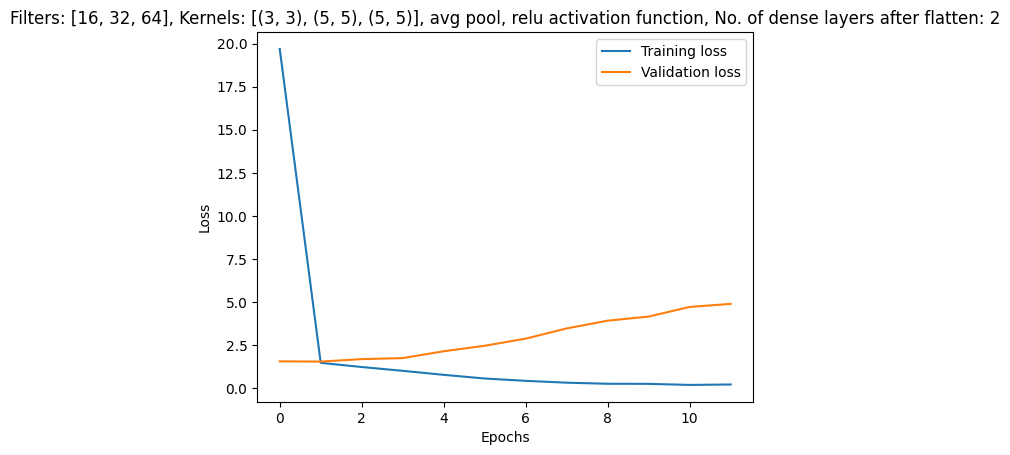

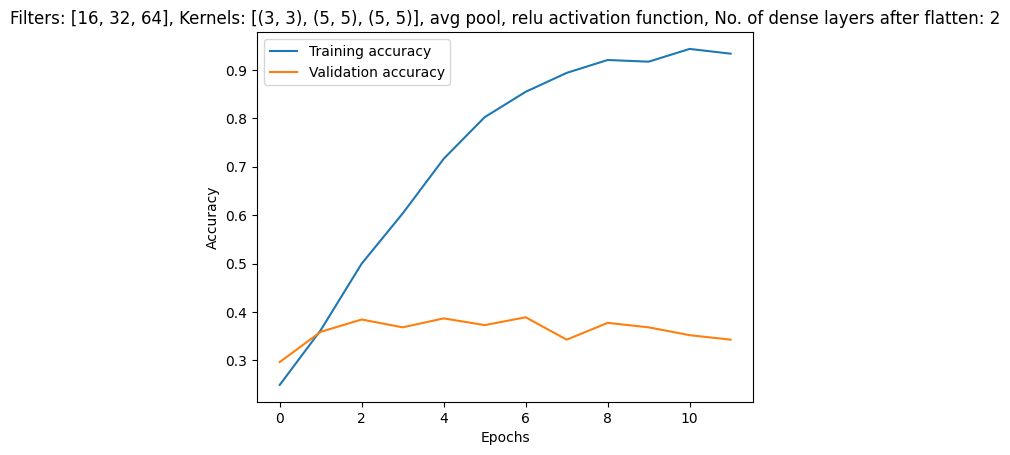

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


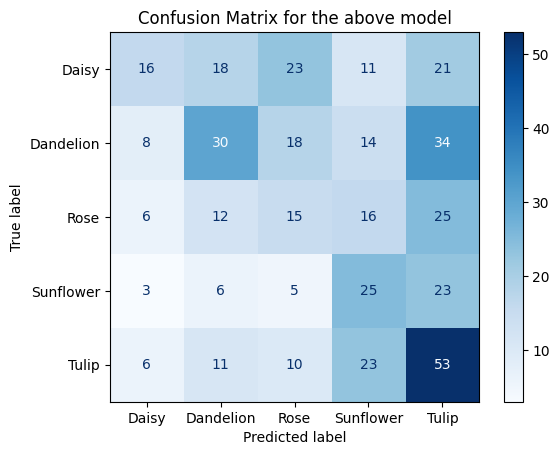

In [ ]:
## Subtask 3

result_df_3 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Training Time(in seconds)'
    ]
)

filters = [16,32,64]
activation='relu'
dropout_rate = 0.1
pool=['max','avg']
epochs = 20

for p in pool:
  test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=best_kernel,
      filters=filters,
      activation_func=activation,
      pool=p,
      dropout_rate=dropout_rate,
      num_dense_layers=best_num_dense,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs
      )

  result_df_3.loc[len(result_df_3.index)]=[
      best_kernel,
      filters,
      p,
      activation,
      best_num_dense,
      dropout_rate,
      test_loss,
      test_accuracy,
      test_f1,
      train_time
  ]

In [ ]:
result_df_3

Conv Kernel Size Conv Filter Size Pooling Layers  \
0  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
1  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            avg   

  Activation Function  No. of Dense Layers after Flatten  Dropout Rate  \
0                relu                                  2           0.1   
1                relu                                  2           0.1   

   Test Loss  Test Accuracy  Test F1 Score  Training Time(in seconds)  
0   1.758649       0.375000       0.368478                 227.504575  
1   1.597902       0.321759       0.311851                 208.192123

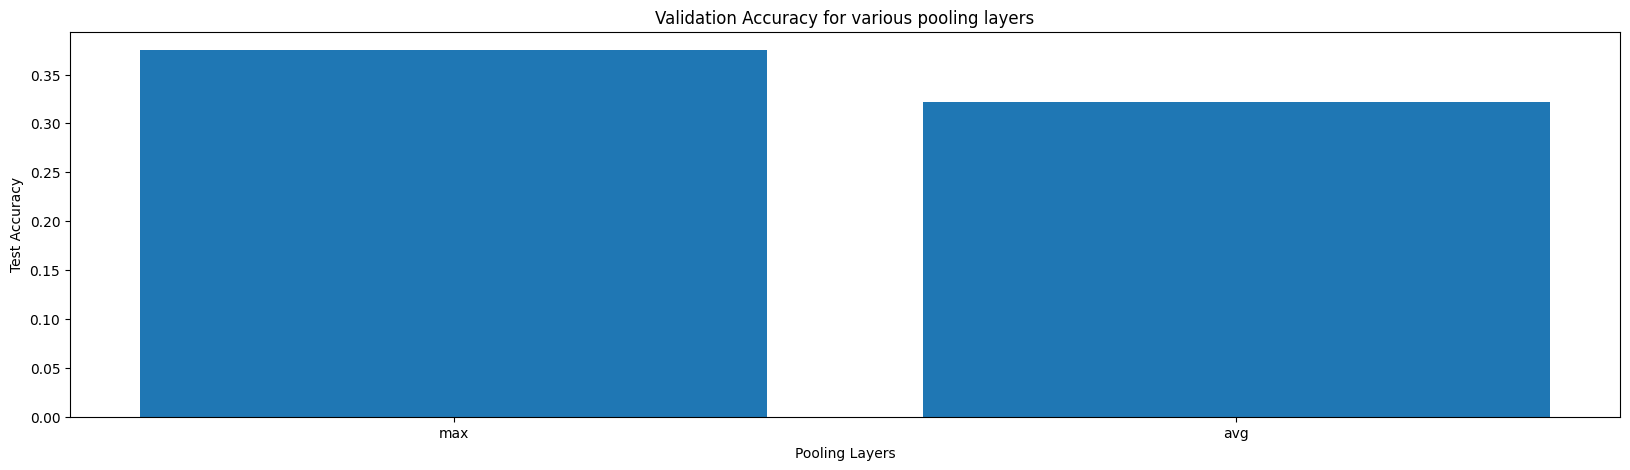

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(
    result_df_3['Pooling Layers'],
    result_df_3['Test Accuracy']
)

plt.ylabel('Test Accuracy')
plt.xlabel('Pooling Layers')
plt.title('Validation Accuracy for various pooling layers')
plt.show()

In [ ]:
best_pool = result_df_3.sort_values(
    by=['Test Accuracy','Test F1 Score'],
    ascending=[False,False]
)['Pooling Layers'].iloc[0]

best_pool

'max'

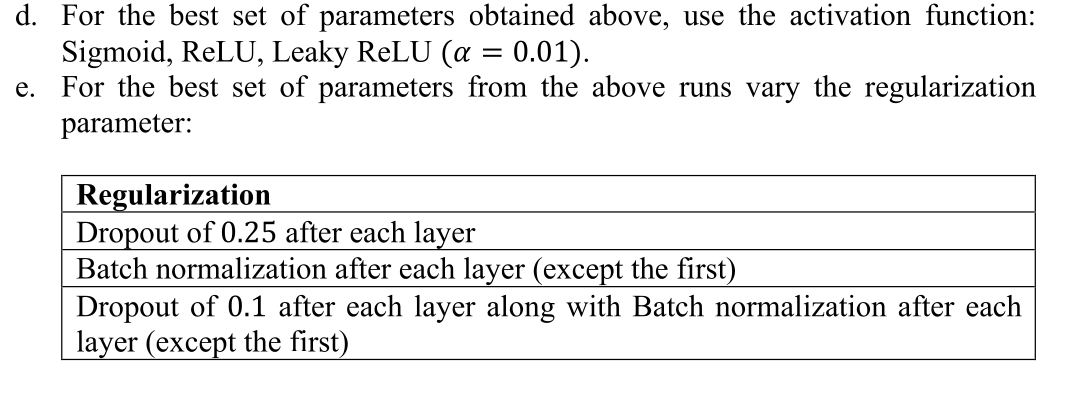

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.2421 - f1_score: 0.1551 - loss: 1.6267 - val_accuracy: 0.2083 - val_f1_score: 0.0718 - val_loss: 1.6189
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.2324 - f1_score: 0.1425 - loss: 1.6046 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6080
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.2201 - f1_score: 0.1440 - loss: 1.6107 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6078
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.2356 - f1_score: 0.1390 - loss: 1.6060 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6063
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.2345 - f1_score: 0.1568 - loss: 1.6080 - val_accuracy: 0.2083 - val_f1_score: 0.0718 - val_loss: 1.6118
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.2374 - f1_score: 0.1460 - loss: 1.6078 - val_accuracy: 0.2454 - va

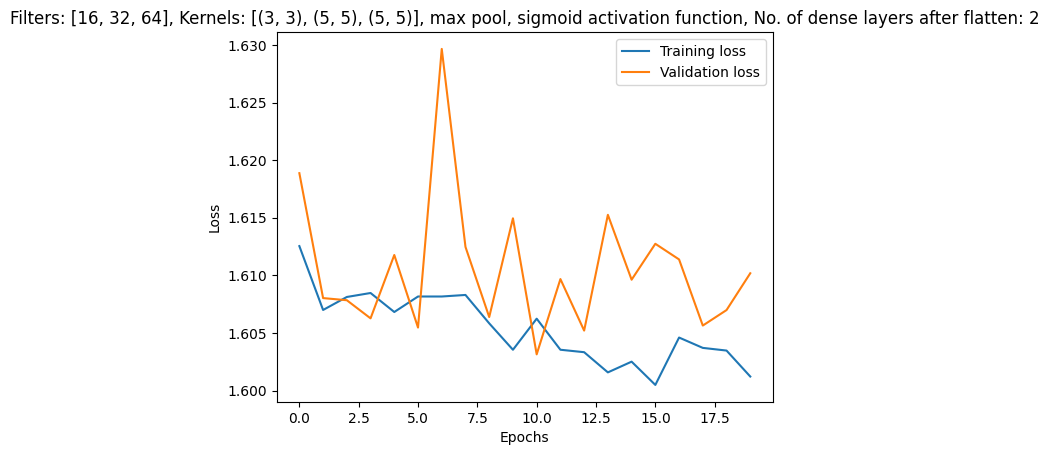

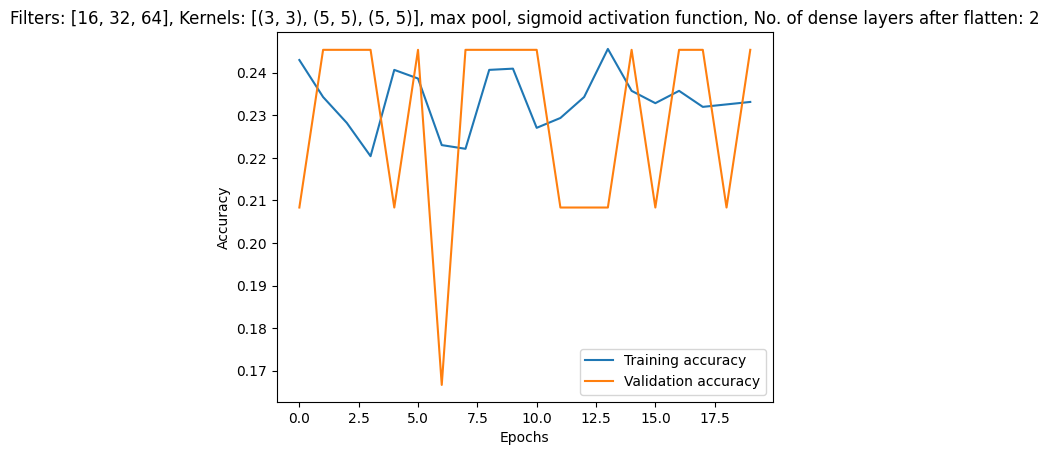

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


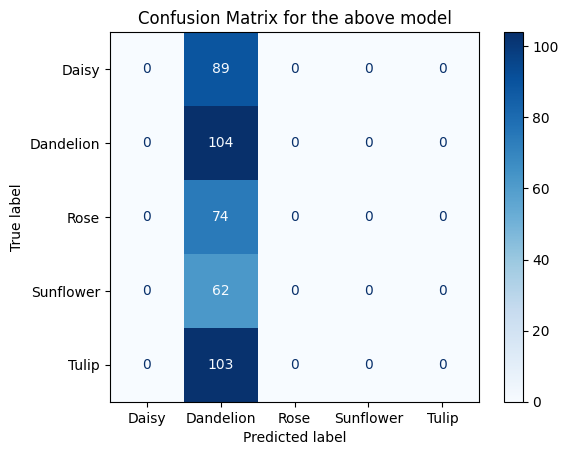

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.2408 - f1_score: 0.2380 - loss: 189.2480 - val_accuracy: 0.3681 - val_f1_score: 0.3521 - val_loss: 2.0062
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.4189 - f1_score: 0.4185 - loss: 1.7014 - val_accuracy: 0.3218 - val_f1_score: 0.2767 - val_loss: 1.9406
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.6098 - f1_score: 0.6088 - loss: 0.9774 - val_accuracy: 0.3819 - val_f1_score: 0.3697 - val_loss: 1.7696
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.7290 - f1_score: 0.7298 - loss: 0.7256 - val_accuracy: 0.3657 - val_f1_score: 0.3478 - val_loss: 2.3024
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.8288 - f1_score: 0.8298 - loss: 0.5196 - val_accuracy: 0.4074 - val_f1_score: 0.3933 - val_loss: 2.1891
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8740 - f1_score: 0.8749 - loss: 0.4043 - val_accuracy: 0.4028 - 

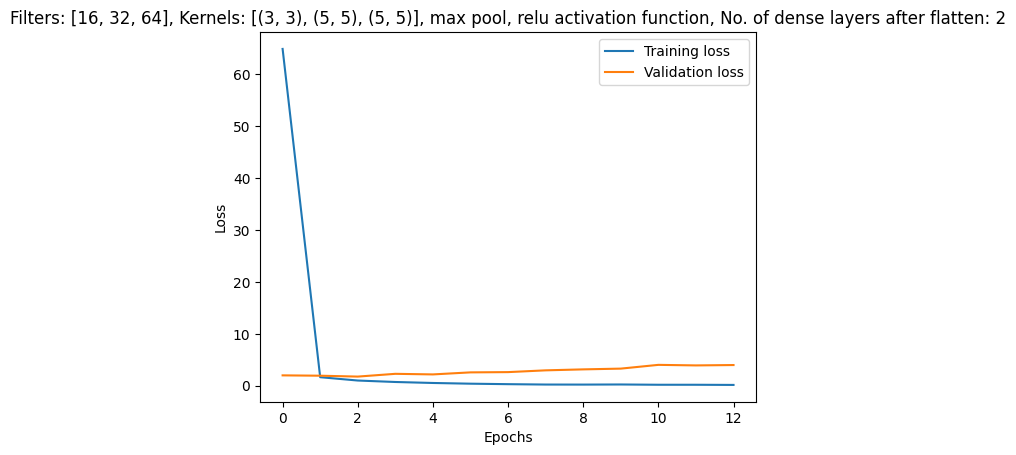

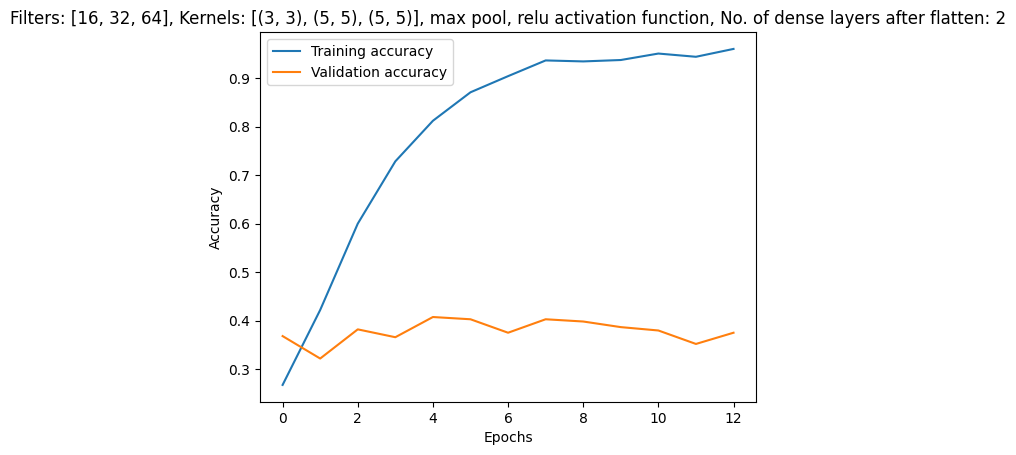

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


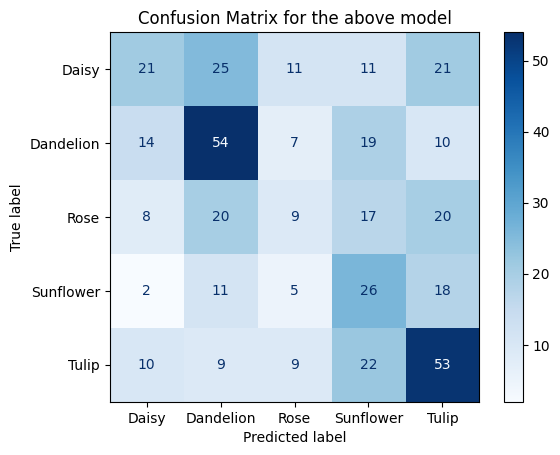

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.2487 - f1_score: 0.2430 - loss: 226.8415 - val_accuracy: 0.3056 - val_f1_score: 0.3064 - val_loss: 2.1821
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.4977 - f1_score: 0.4959 - loss: 1.4525 - val_accuracy: 0.3194 - val_f1_score: 0.3240 - val_loss: 1.9707
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.6741 - f1_score: 0.6716 - loss: 0.8715 - val_accuracy: 0.3519 - val_f1_score: 0.3492 - val_loss: 2.0662
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.7846 - f1_score: 0.7818 - loss: 0.6272 - val_accuracy: 0.3634 - val_f1_score: 0.3487 - val_loss: 2.2012
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.8648 - f1_score: 0.8637 - loss: 0.4250 - val_accuracy: 0.3889 - val_f1_score: 0.3855 - val_loss: 2.3269
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9251 - f1_score: 0.9250 - loss: 0.2935 - val_accuracy: 0.3773 - 

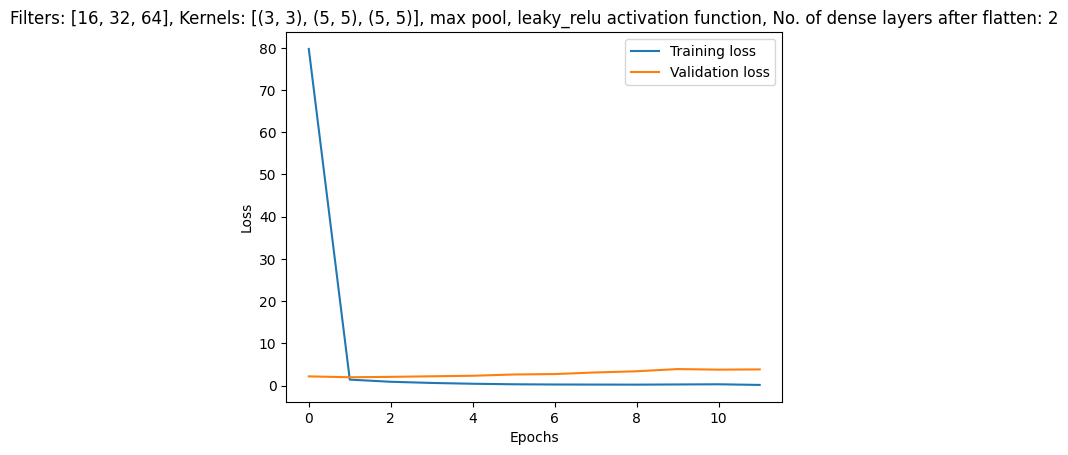

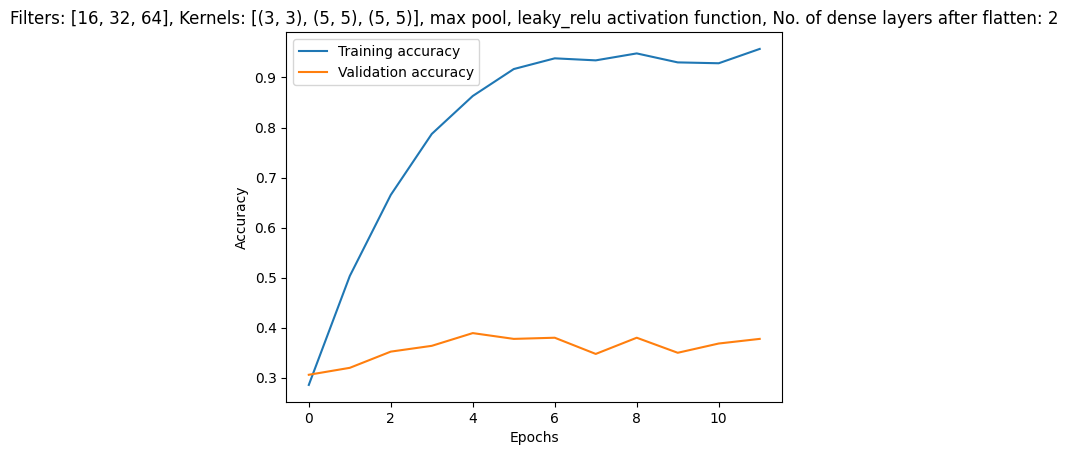

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


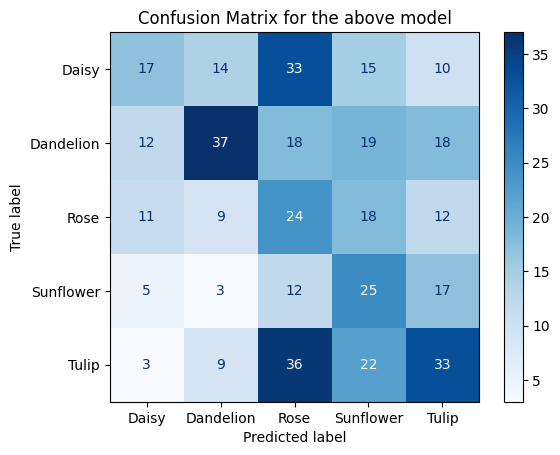

In [ ]:
# Subtask 4

result_df_4 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Training Time(in seconds)'
    ]
)

filters = [16,32,64]
activation_list=['sigmoid','relu','leaky_relu']
dropout_rate = 0.1
epochs = 20

for activation in activation_list:
  test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=best_kernel,
      filters=filters,
      activation_func=activation,
      pool=best_pool,
      dropout_rate=dropout_rate,
      num_dense_layers=best_num_dense,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs
      )

  result_df_4.loc[len(result_df_4.index)]=[
      best_kernel,
      filters,
      best_pool,
      activation,
      best_num_dense,
      dropout_rate,
      test_loss,
      test_accuracy,
      test_f1,
      train_time
  ]

In [ ]:
result_df_4

Conv Kernel Size Conv Filter Size Pooling Layers  \
0  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
1  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
2  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   

  Activation Function  No. of Dense Layers after Flatten  Dropout Rate  \
0             sigmoid                                  2           0.1   
1                relu                                  2           0.1   
2          leaky_relu                                  2           0.1   

   Test Loss  Test Accuracy  Test F1 Score  Training Time(in seconds)  
0   1.603075       0.240741       0.093422                 359.342255  
1   1.896071       0.377315       0.363352                 239.423267  
2   2.026578       0.314815       0.320192                 210.245085

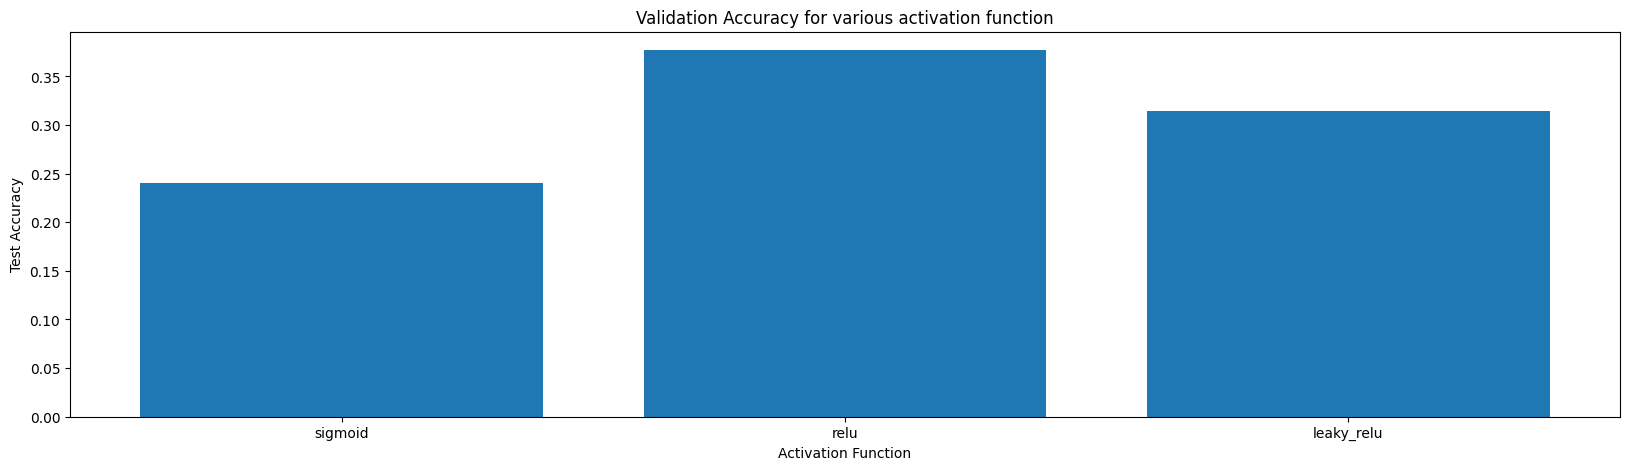

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(
    result_df_4['Activation Function'],
    result_df_4['Test Accuracy']
)

plt.ylabel('Test Accuracy')
plt.xlabel('Activation Function')
plt.title('Validation Accuracy for various activation function')
plt.show()

In [ ]:
best_activation_function = result_df_4.sort_values(
    by=['Test Accuracy','Test F1 Score'],
    ascending=[False,False]
)['Activation Function'].iloc[0]

best_activation_function

'relu'

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.2102 - f1_score: 0.2049 - loss: 9.4014 - val_accuracy: 0.2801 - val_f1_score: 0.2679 - val_loss: 1.6251
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.5163 - f1_score: 0.5125 - loss: 1.3066 - val_accuracy: 0.3194 - val_f1_score: 0.3024 - val_loss: 1.7811
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.6823 - f1_score: 0.6827 - loss: 0.9143 - val_accuracy: 0.3310 - val_f1_score: 0.3181 - val_loss: 2.1691
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.7920 - f1_score: 0.7919 - loss: 0.6391 - val_accuracy: 0.2801 - val_f1_score: 0.2662 - val_loss: 2.7814
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - accuracy: 0.8402 - f1_score: 0.8400 - loss: 0.5474 - val_accuracy: 0.3148 - val_f1_score: 0.2975 - val_loss: 3.6367
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - accuracy: 0.8896 - f1_score: 0.8899 - loss: 0.4420 - val_accuracy: 0.2593 - va

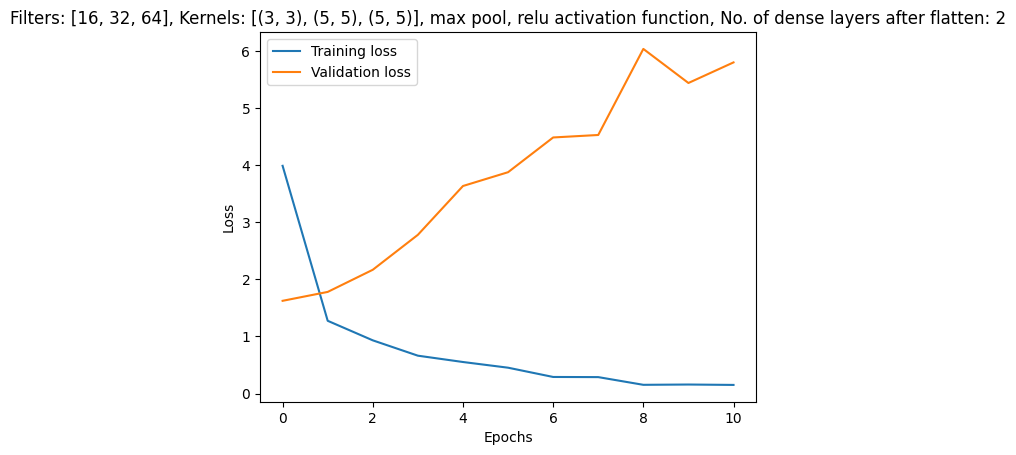

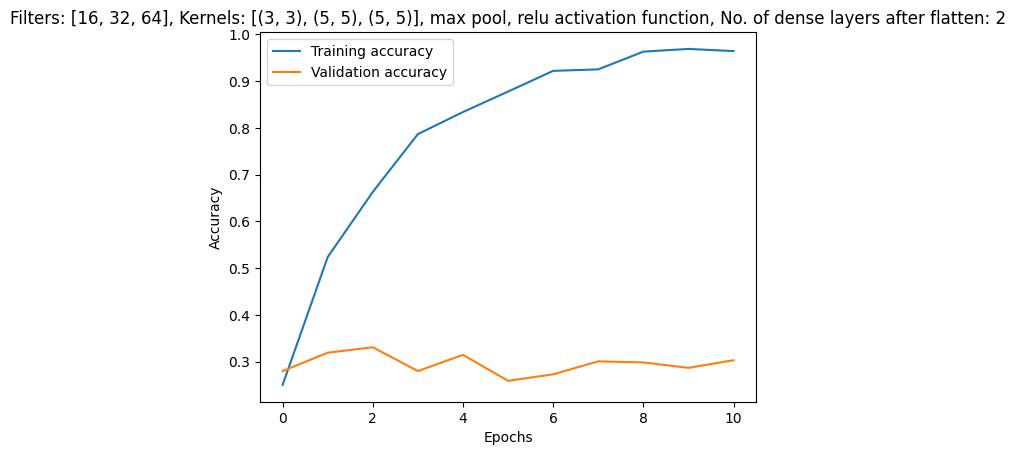

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


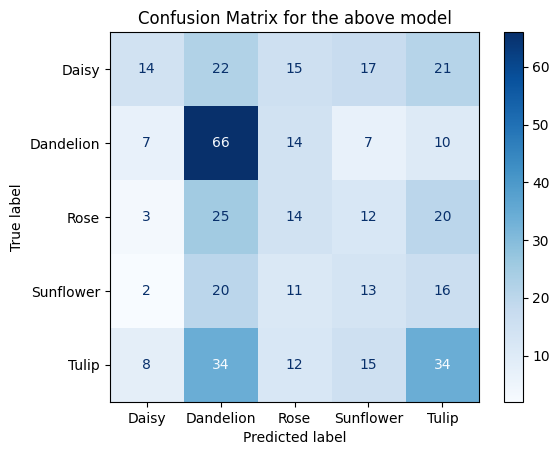

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,213 (5.96 MB)

 Trainable params: 1,562,213 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.2192 - f1_score: 0.2157 - loss: 89.8713 - val_accuracy: 0.2523 - val_f1_score: 0.2369 - val_loss: 1.6610
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.3869 - f1_score: 0.3713 - loss: 1.4517 - val_accuracy: 0.3356 - val_f1_score: 0.3129 - val_loss: 1.6257
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.5381 - f1_score: 0.5275 - loss: 1.1971 - val_accuracy: 0.3426 - val_f1_score: 0.3265 - val_loss: 1.7339
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.6532 - f1_score: 0.6511 - loss: 0.9490 - val_accuracy: 0.3634 - val_f1_score: 0.3326 - val_loss: 1.8115
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.7619 - f1_score: 0.7607 - loss: 0.7182 - val_accuracy: 0.3704 - val_f1_score: 0.3486 - val_loss: 1.8873
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.7859 - f1_score: 0.7842 - loss: 0.6197 - val_accuracy: 0.3565 - v

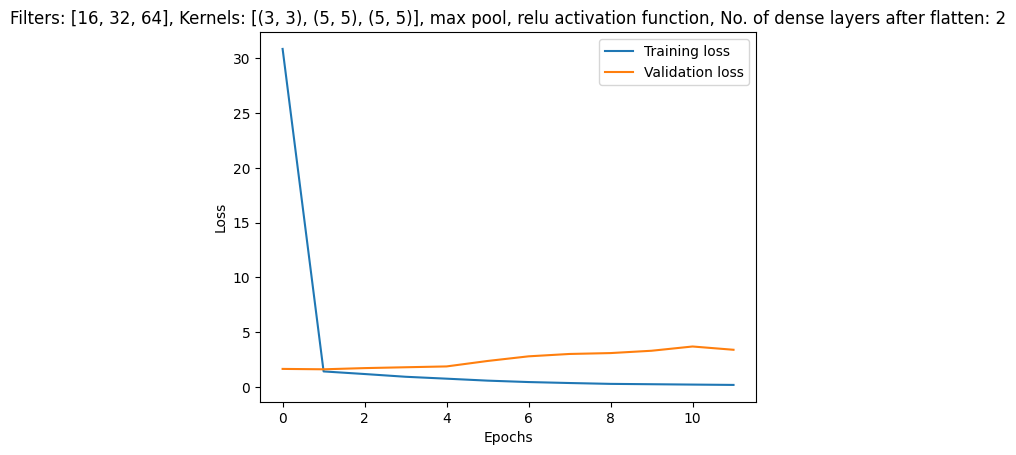

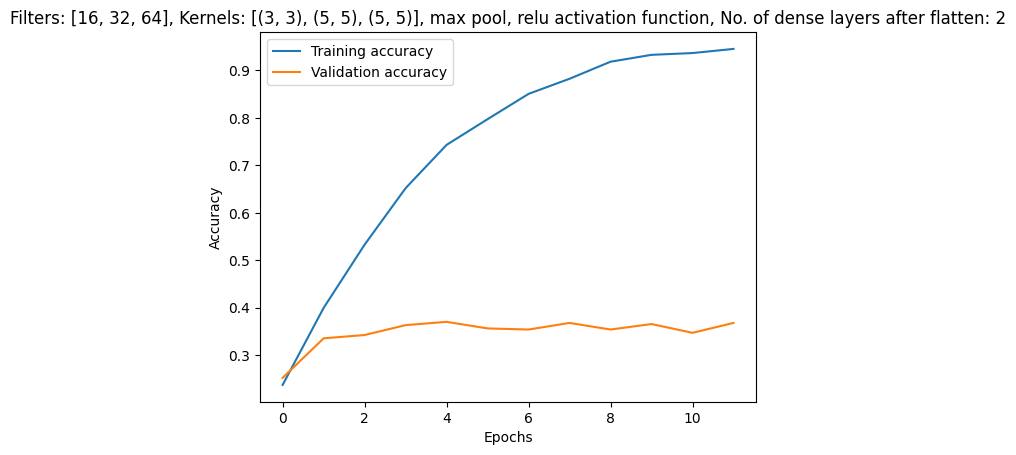

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


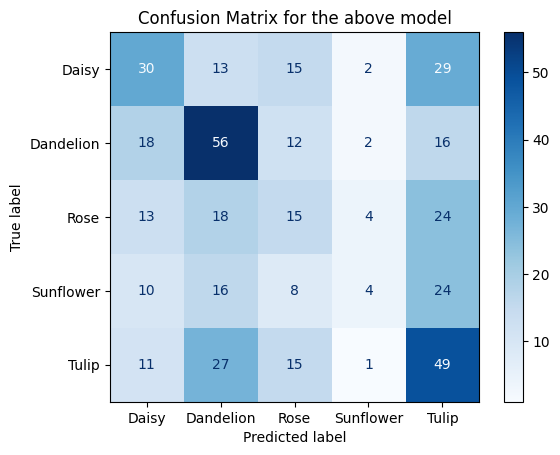

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 39, 39, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,277 (5.96 MB)

 Trainable params: 1,562,245 (5.96 MB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.2926 - f1_score: 0.2885 - loss: 3.2829 - val_accuracy: 0.3241 - val_f1_score: 0.2922 - val_loss: 2.3232
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.5564 - f1_score: 0.5523 - loss: 1.1791 - val_accuracy: 0.4213 - val_f1_score: 0.4066 - val_loss: 1.6195
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.7810 - f1_score: 0.7808 - loss: 0.6359 - val_accuracy: 0.4028 - val_f1_score: 0.3872 - val_loss: 2.0123
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.8960 - f1_score: 0.8963 - loss: 0.3274 - val_accuracy: 0.3935 - val_f1_score: 0.3668 - val_loss: 2.7691
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9543 - f1_score: 0.9543 - loss: 0.1645 - val_accuracy: 0.4236 - val_f1_score: 0.4156 - val_loss: 2.3500
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.9813 - f1_score: 0.9813 - loss: 0.0838 - val_accuracy: 0.3889 - va

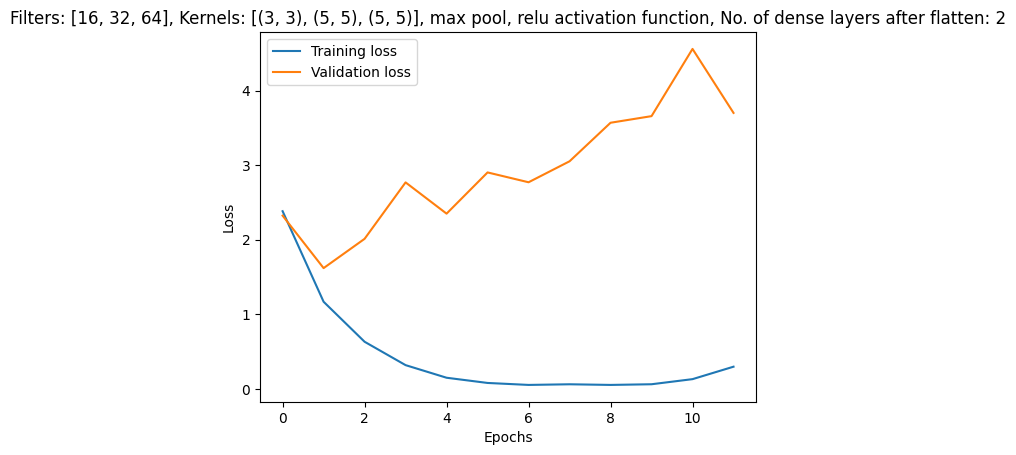

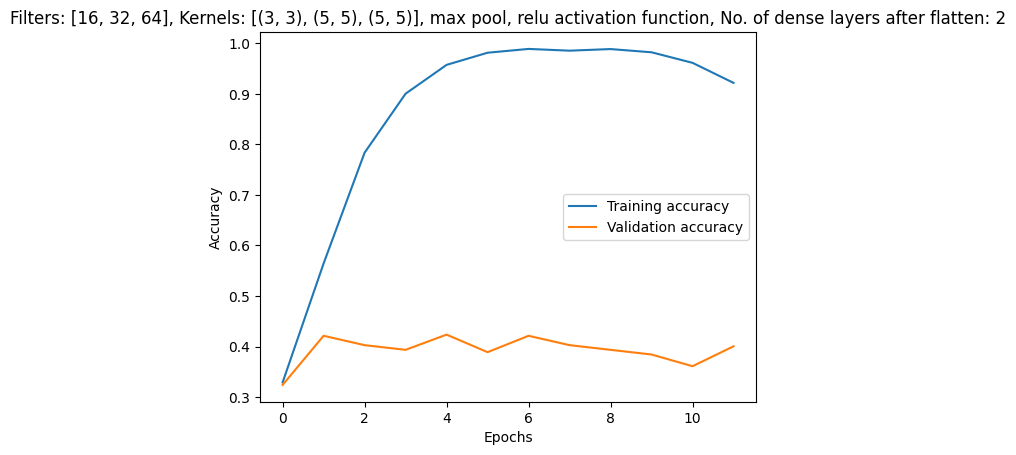

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


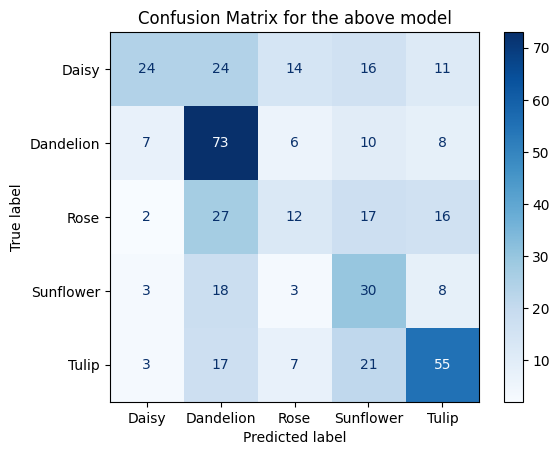

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 78, 78, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 39, 39, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 39, 39, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 24336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │       1,557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,277 (5.96 MB)

 Trainable params: 1,562,245 (5.96 MB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.3085 - f1_score: 0.3049 - loss: 2.8237 - val_accuracy: 0.3079 - val_f1_score: 0.2847 - val_loss: 1.8885
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.4960 - f1_score: 0.4902 - loss: 1.2529 - val_accuracy: 0.3449 - val_f1_score: 0.3296 - val_loss: 1.7837
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 0.6838 - f1_score: 0.6812 - loss: 0.8260 - val_accuracy: 0.2894 - val_f1_score: 0.2437 - val_loss: 2.1348
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.8160 - f1_score: 0.8152 - loss: 0.5066 - val_accuracy: 0.3542 - val_f1_score: 0.3437 - val_loss: 2.4368
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9196 - f1_score: 0.9197 - loss: 0.2631 - val_accuracy: 0.3819 - val_f1_score: 0.3694 - val_loss: 2.2777
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.9489 - f1_score: 0.9488 - loss: 0.1810 - val_accuracy: 0.3773 - va

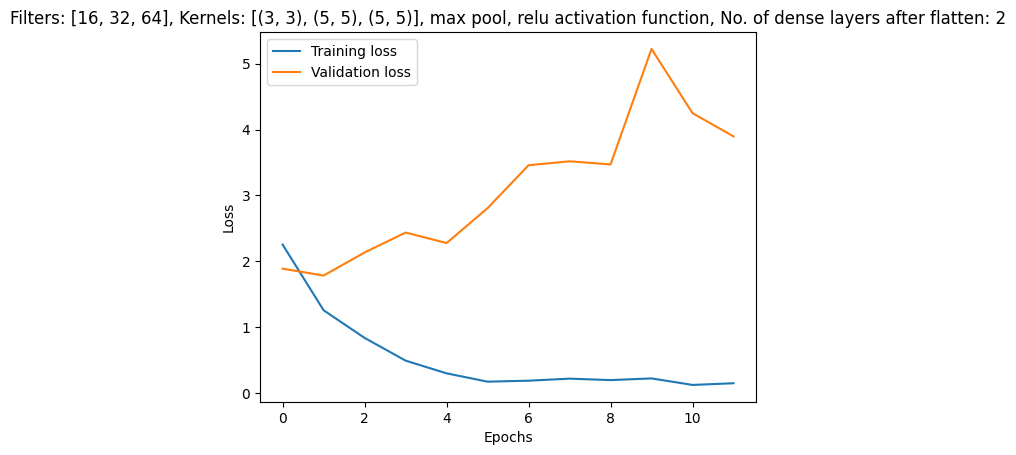

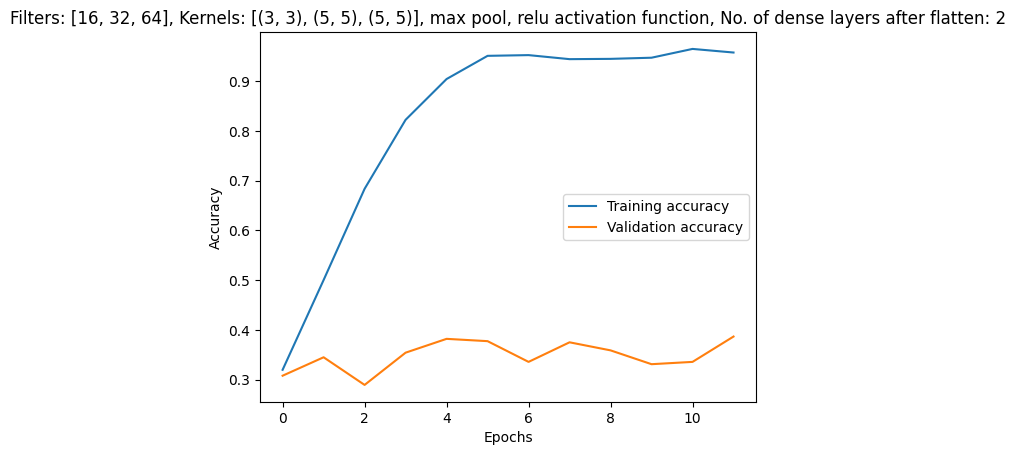

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


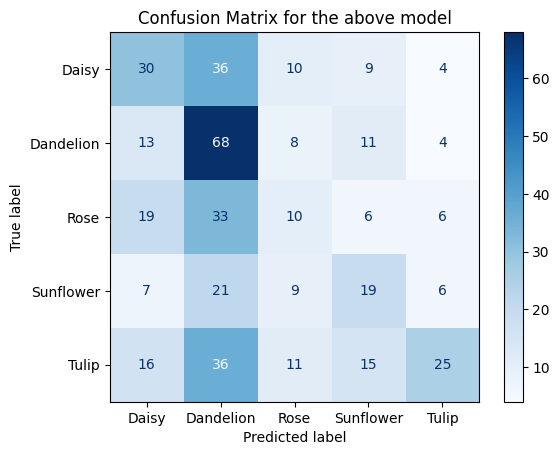

In [ ]:
# Subtask 5

result_df_5 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Batch Normalization Presence',
        'Training Time(in seconds)'
    ]
)

filters = [16,32,64]
dropout_rates = [0.1,0.25,0,0.1]
batch_norm=[False,False,True,True]
epochs = 20

for dropout_rate,add_batch in zip(dropout_rates,batch_norm):
  test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=best_kernel,
      filters=filters,
      activation_func=best_activation_function,
      pool=best_pool,
      dropout_rate=dropout_rate,
      num_dense_layers=best_num_dense,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs,
      add_batch_normalization=add_batch
      )

  result_df_5.loc[len(result_df_5.index)]=[
      best_kernel,
      filters,
      best_pool,
      best_activation_function,
      best_num_dense,
      dropout_rate,
      test_loss,
      test_accuracy,
      test_f1,
      add_batch,
      train_time
  ]

In [ ]:
result_df_5

Conv Kernel Size Conv Filter Size Pooling Layers  \
0  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
1  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
2  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
3  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   

  Activation Function  No. of Dense Layers after Flatten  Dropout Rate  \
0                relu                                  2          0.10   
1                relu                                  2          0.25   
2                relu                                  2          0.00   
3                relu                                  2          0.10   

   Test Loss  Test Accuracy  Test F1 Score  Batch Normalization Presence  \
0   1.597296       0.326389       0.307509                         False   
1   1.653766       0.356481       0.335163                         False   
2   1.618985       0.449074       0.432022                          True   
3   1.774643       0.351852       0.334242                          True   

   Training Time(in seconds)  
0                 221.190828  
1                 210.900421  
2                 212.703463  
3                 222.437056

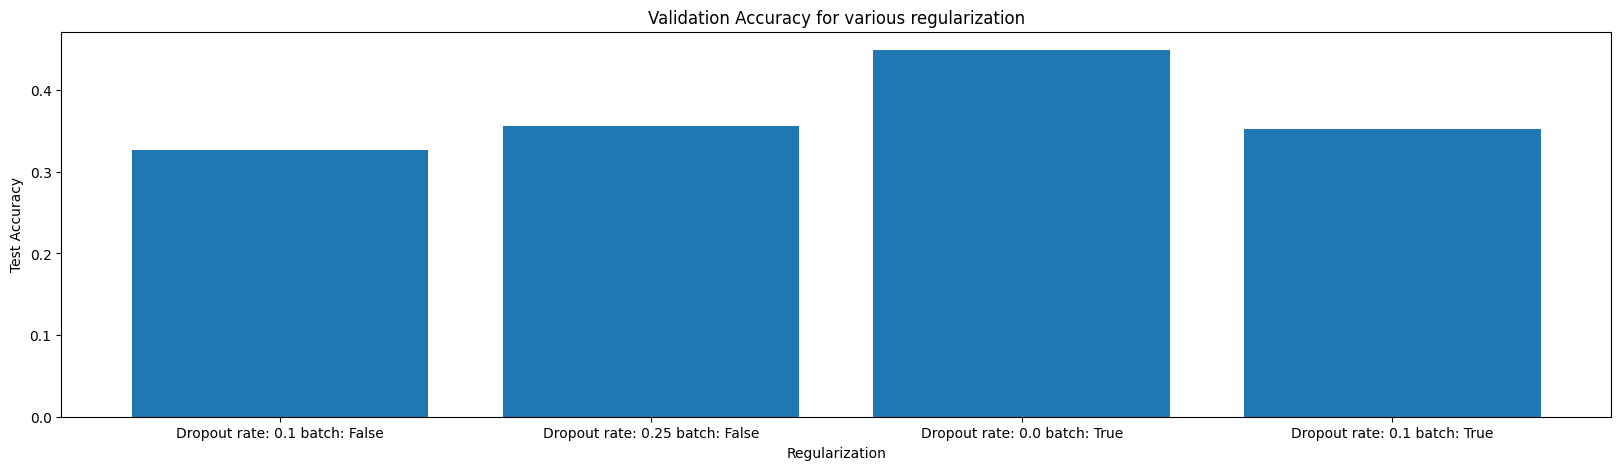

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(
    [f'Dropout rate: {drop} batch: {batch}' for drop,batch in zip(result_df_5['Dropout Rate'],result_df_5['Batch Normalization Presence'])],
    result_df_5['Test Accuracy']
)

plt.ylabel('Test Accuracy')
plt.xlabel('Regularization')
plt.title('Validation Accuracy for various regularization')
plt.show()

In [ ]:
best_dropout = result_df_5.sort_values(
    by=['Test Accuracy','Test F1 Score'],
    ascending=[False,False]
)['Dropout Rate'].iloc[0]

best_dropout

0.0

In [ ]:
best_do_batch = result_df_5.sort_values(
    by=['Test Accuracy','Test F1 Score'],
    ascending=[False,False]
)['Batch Normalization Presence'].iloc[0]

best_do_batch

True

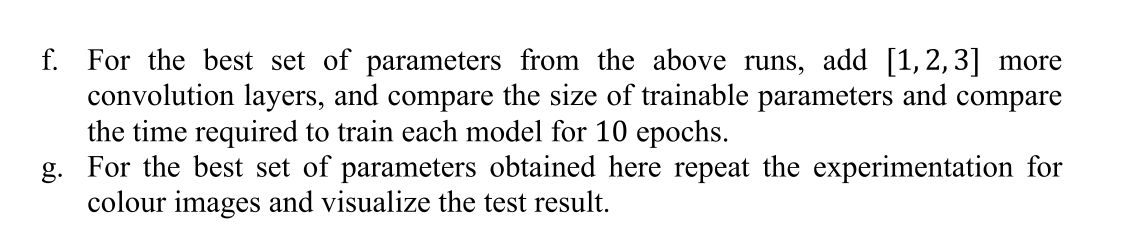

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.2902 - f1_score: 0.2789 - loss: 2.7041 - val_accuracy: 0.3449 - val_f1_score: 0.2868 - val_loss: 1.6243
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4680 - f1_score: 0.4586 - loss: 1.3390 - val_accuracy: 0.3403 - val_f1_score: 0.3248 - val_loss: 1.5946
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6392 - f1_score: 0.6378 - loss: 0.9517 - val_accuracy: 0.2986 - val_f1_score: 0.2681 - val_loss: 2.0661
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7875 - f1_score: 0.7874 - loss: 0.5885 - val_accuracy: 0.3148 - val_f1_score: 0.3014 - val_loss: 2.1523
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8937 - f1_score: 0.8939 - loss: 0.3075 - val_accuracy: 0.3611 - val_f1_score: 0.3543 - val_loss: 2.3535
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9372 - f1_score: 0.9372 - loss: 0.1979 - val_accuracy: 0.3565 - val_f1_score: 0.346

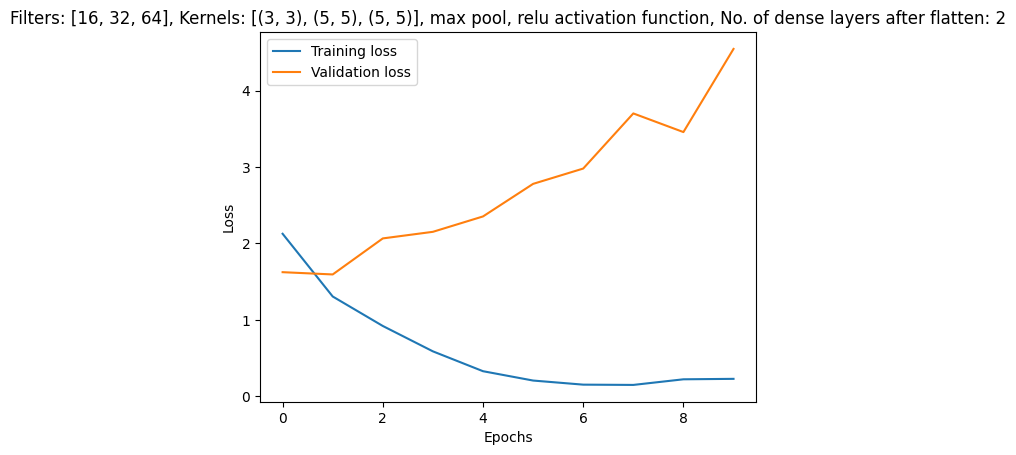

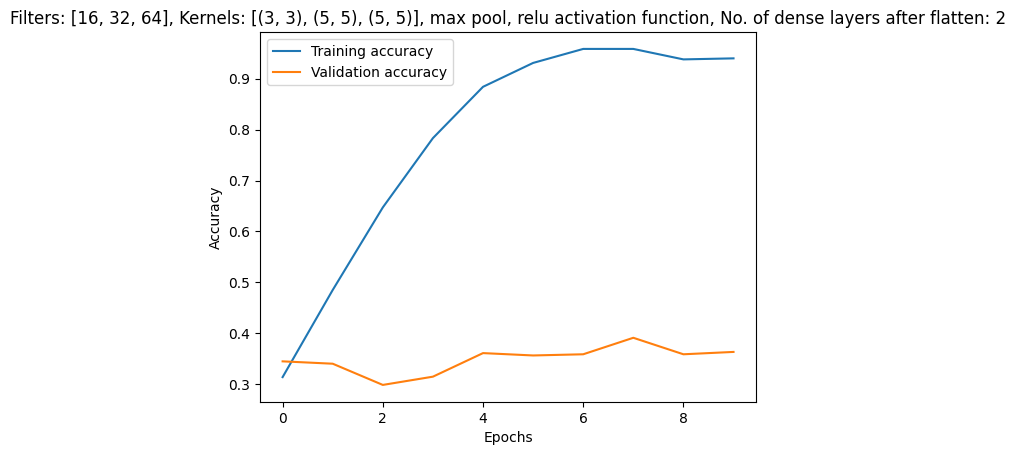

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


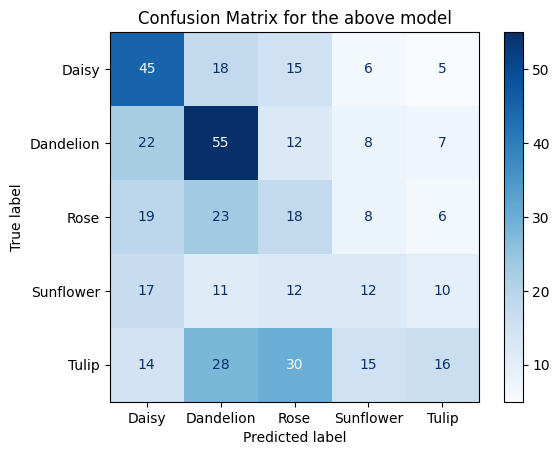

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.2472 - f1_score: 0.2428 - loss: 3.8436 - val_accuracy: 0.3264 - val_f1_score: 0.3001 - val_loss: 1.5401
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4568 - f1_score: 0.4535 - loss: 1.3349 - val_accuracy: 0.3218 - val_f1_score: 0.2507 - val_loss: 2.2705
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6738 - f1_score: 0.6730 - loss: 0.8941 - val_accuracy: 0.3171 - val_f1_score: 0.2621 - val_loss: 2.0527
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8262 - f1_score: 0.8267 - loss: 0.5211 - val_accuracy: 0.3981 - val_f1_score: 0.3835 - val_loss: 2.3187
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9072 - f1_score: 0.9072 - loss: 0.3232 - val_accuracy: 0.3542 - val_f1_score: 0.3458 - val_loss: 2.8635
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9336 - f1_score: 0.9336 - loss: 0.2581 - val_accuracy: 0.3819 - val_f1_score: 0.

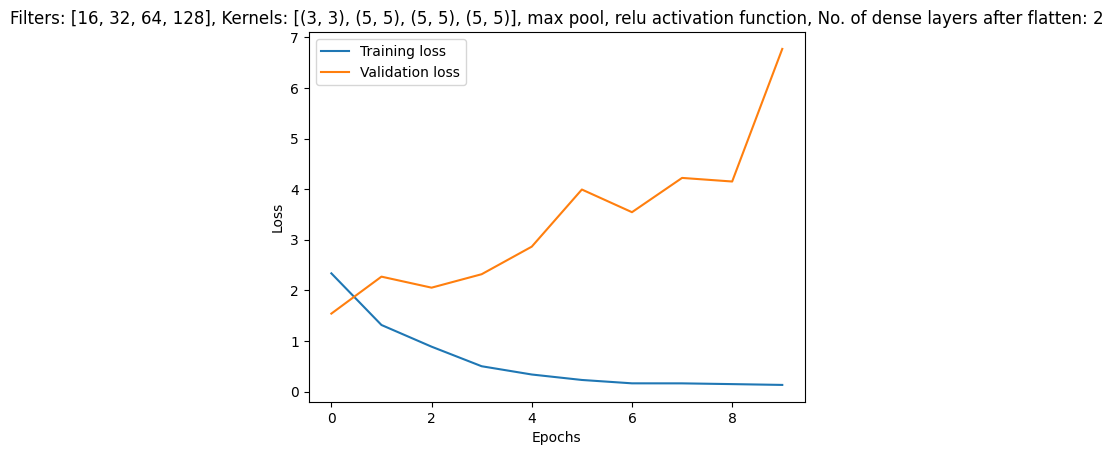

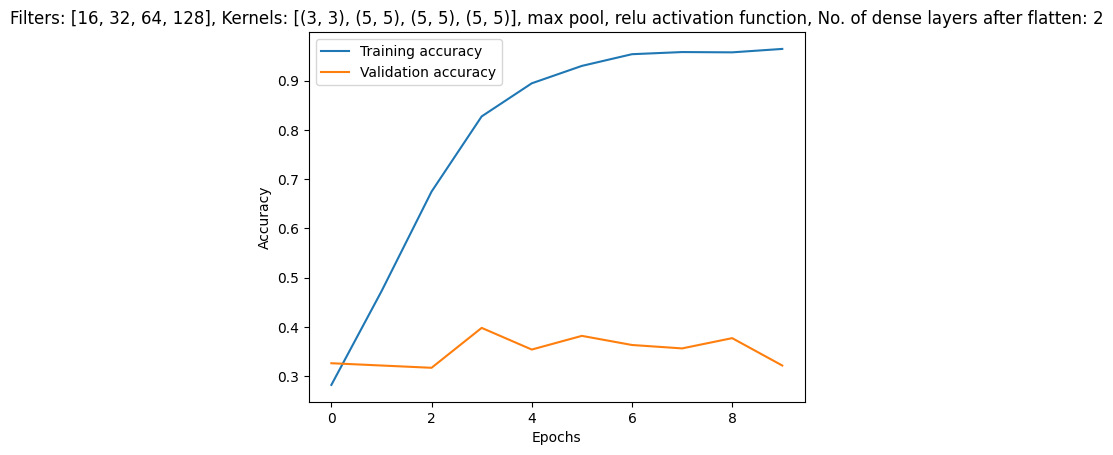

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


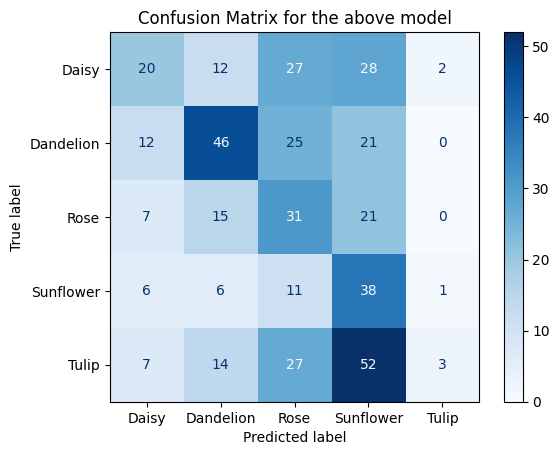

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.2309 - f1_score: 0.1277 - loss: 4.4110 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6031
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2505 - f1_score: 0.1004 - loss: 1.5976 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6039
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2345 - f1_score: 0.0892 - loss: 1.6025 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6050
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2368 - f1_score: 0.0908 - loss: 1.6019 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6045
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2544 - f1_score: 0.1033 - loss: 1.5904 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6043
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.2486 - f1_score: 0.0993 - loss: 1.5965 - val_accuracy: 0.2454 - val_f1_score:

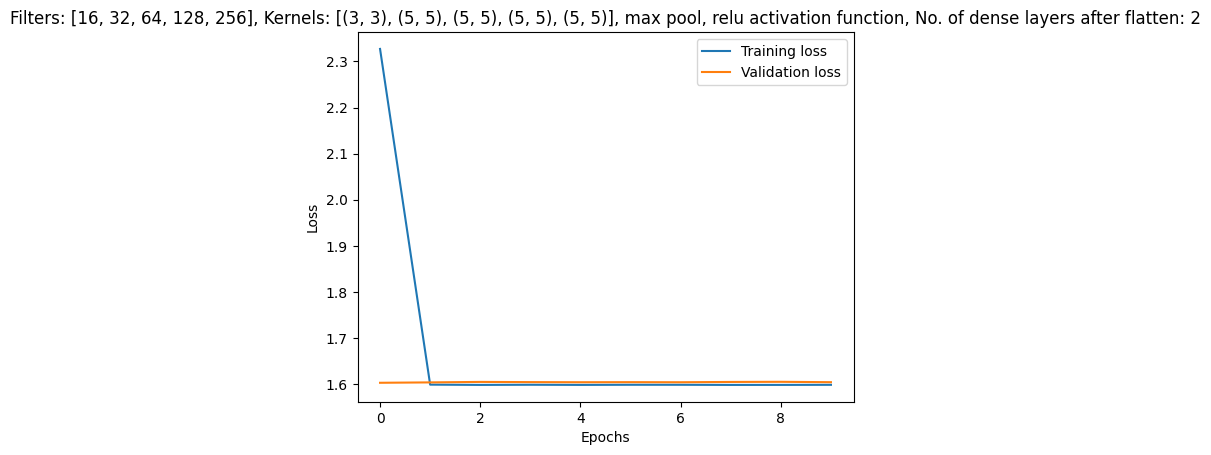

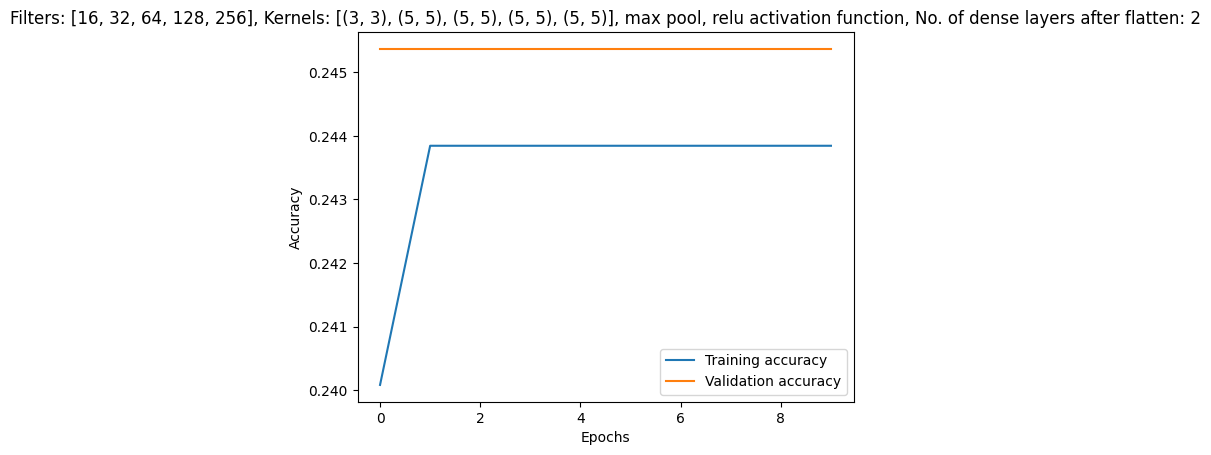

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


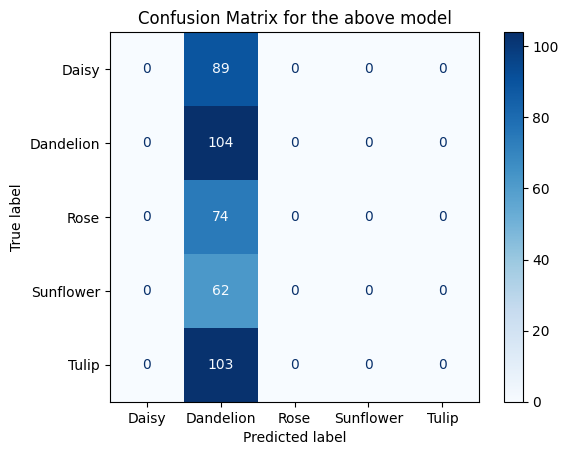

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.2140 - f1_score: 0.1530 - loss: 18.3655 - val_accuracy: 0.2083 - val_f1_score: 0.0718 - val_loss: 1.6065
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.2346 - f1_score: 0.1042 - loss: 1.6045 - val_accuracy: 0.2083 - val_f1_score: 0.0718 - val_loss: 1.6060
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.2551 - f1_score: 0.1448 - loss: 1.5932 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6032
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.2338 - f1_score: 0.0887 - loss: 1.6002 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6048
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.2420 - f1_score: 0.0944 - loss: 1.5970 - val_accuracy: 0.2454 - val_f1_score: 0.0967 - val_loss: 1.6047
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.2407 - f1_score: 0.0934 - loss: 1.6009 - val_accuracy: 0.2454 - val_f1_sc

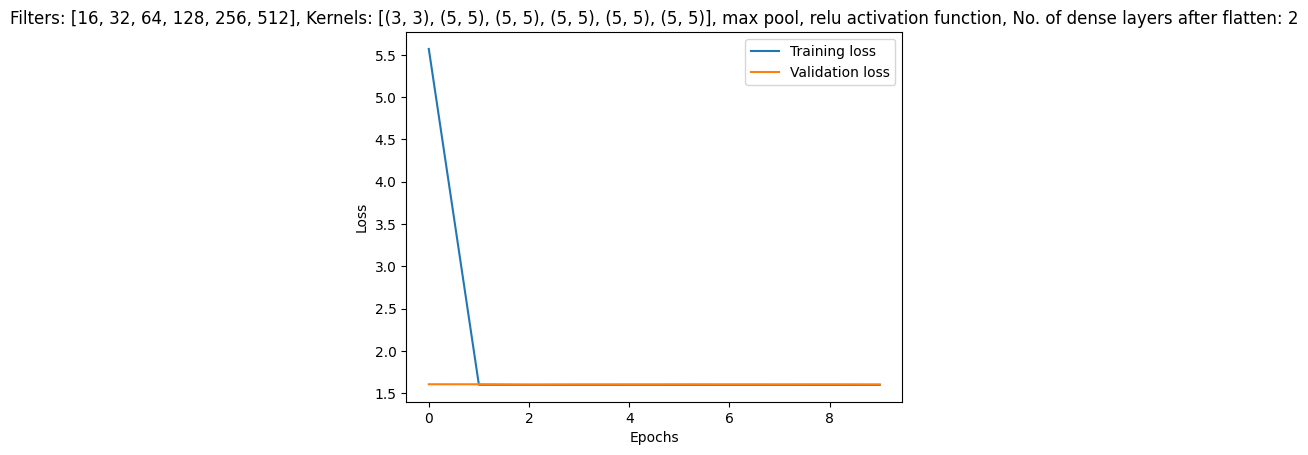

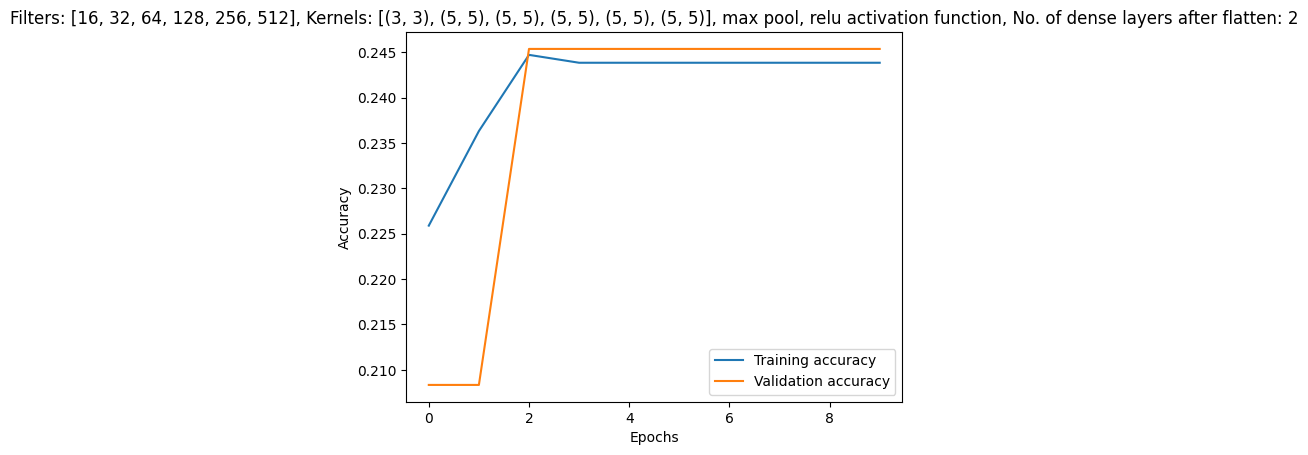

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


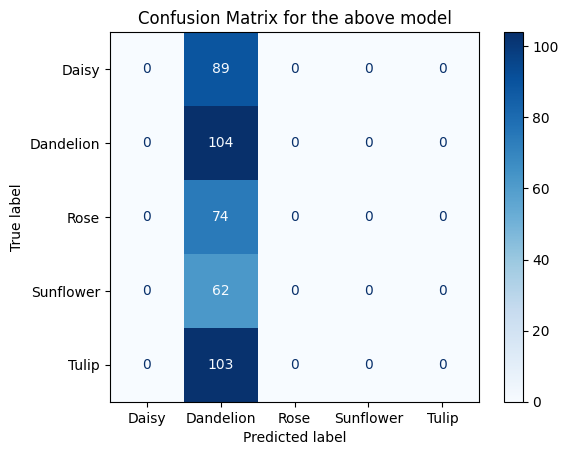

In [ ]:
# Subtask 6

result_df_6 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Batch Normalization Presence',
        'No. of Extra Conv Layers',
        'Training Time(in seconds)'
    ]
)

filters = [16,32,64]
epochs = 10
extra_conv_layers =  [0,1,2,3]


for c in extra_conv_layers:
  filter_copy=[]
  kernel_copy=[]

  for filt,ker in zip(filters,best_kernel):
    filter_copy.append(filt)
    kernel_copy.append(ker)

  test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=kernel_copy,
      filters=filter_copy,
      activation_func=best_activation_function,
      pool=best_pool,
      dropout_rate=best_dropout,
      num_dense_layers=best_num_dense,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs,
      add_batch_normalization=best_do_batch,
      extra_conv_layers=c
      )

  result_df_6.loc[len(result_df_6.index)]=[
      kernel_copy,
      filter_copy,
      best_pool,
      best_activation_function,
      best_num_dense,
      best_dropout,
      test_loss,
      test_accuracy,
      test_f1,
      best_do_batch,
      c,
      train_time
  ]

In [ ]:
result_df_6

Conv Kernel Size  \
0                          [(3, 3), (5, 5), (5, 5)]   
1                  [(3, 3), (5, 5), (5, 5), (5, 5)]   
2          [(3, 3), (5, 5), (5, 5), (5, 5), (5, 5)]   
3  [(3, 3), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5)]   

              Conv Filter Size Pooling Layers Activation Function  \
0                 [16, 32, 64]            max                relu   
1            [16, 32, 64, 128]            max                relu   
2       [16, 32, 64, 128, 256]            max                relu   
3  [16, 32, 64, 128, 256, 512]            max                relu   

   No. of Dense Layers after Flatten  Dropout Rate  Test Loss  Test Accuracy  \
0                                  2           0.0   1.611055       0.337963   
1                                  2           0.0   1.541854       0.319444   
2                                  2           0.0   1.598533       0.240741   
3                                  2           0.0   1.598295       0.240741   

   Test F1 Score  Batch Normalization Presence  No. of Extra Conv Layers  \
0       0.322045                          True                         0   
1       0.287592                          True                         1   
2       0.093422                          True                         2   
3       0.093422                          True                         3   

   Training Time(in seconds)  
0                  12.167886  
1                  22.891176  
2                  53.980586  
3                 128.194670

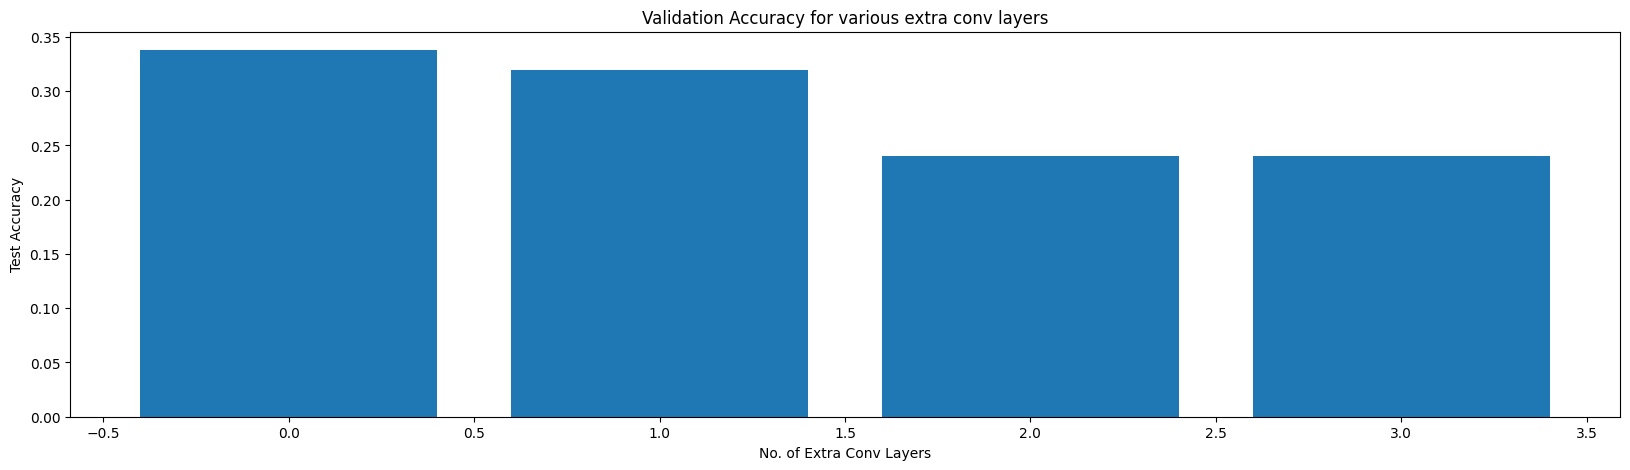

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(
    result_df_6['No. of Extra Conv Layers'],
    result_df_6['Test Accuracy']
)

plt.ylabel('Test Accuracy')
plt.xlabel('No. of Extra Conv Layers')
plt.title('Validation Accuracy for various extra conv layers')
plt.show()

In [ ]:
best_conv = result_df_6.sort_values(
    by=['Test Accuracy','Test F1 Score'],
    ascending=[False,False]
)['No. of Extra Conv Layers'].iloc[0]

best_conv

0

In [ ]:
# Subtask 7

# Prepare the RGB dataset

X_rgb = []  # Contains the images
Y_rgb = []  # Contains the labels

In [ ]:
def train_data_rgb(flower_type,path_dir):
  for img in tqdm(os.listdir(path_dir)):
        label=flower_type
        path = os.path.join(path_dir,img)
        img_array = Image.open(path)
        img_array = img_array.resize((IMG_SIZE,IMG_SIZE))
        img_array = np.array(img_array)
        X_rgb.append(np.array(img_array))
        Y_rgb.append(str(label))

In [ ]:
train_data_rgb('Daisy',FLOWER_DAISY_DIR)
train_data_rgb('Sunflower',FLOWER_SUNFLOWER_DIR)
train_data_rgb('Tulip',FLOWER_TULIP_DIR)
train_data_rgb('Dandelion',FLOWER_DANDI_DIR)
train_data_rgb('Rose',FLOWER_ROSE_DIR)

100%|██████████| 784/784 [00:03<00:00, 220.30it/s]


Daisy


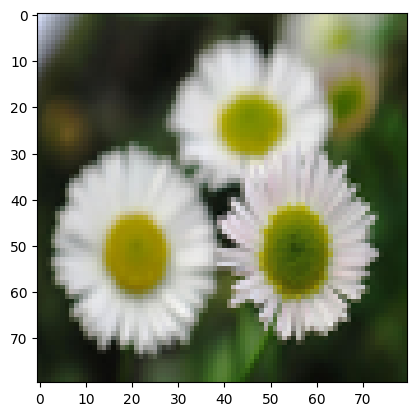

In [ ]:
import matplotlib.image as mpimg
plt.imshow(X_rgb[223])

print(Y_rgb[223])

In [ ]:
from sklearn.model_selection import train_test_split

X_train_rgb,X_rem_rgb,y_train_rgb,y_rem_rgb = train_test_split(X_rgb,Y_rgb,test_size=0.2,random_state=5)
X_test_rgb,X_val_rgb,y_test_rgb,y_val_rgb = train_test_split(X_rem_rgb,y_rem_rgb,test_size=0.5,random_state=5)

print(len(X_train_rgb))
print(len(y_train_rgb))
print(len(X_val_rgb))
print(len(y_val_rgb))
print(len(X_test_rgb))
print(len(y_test_rgb))

3453
3453
432
432
432
432


In [ ]:
# Convert to np array for tf processing
X_train_rgb=np.array(X_train_rgb)
X_val_rgb=np.array(X_val_rgb)
X_test_rgb=np.array(X_test_rgb)
y_train_rgb=np.array(y_train_rgb)
y_val_rgb=np.array(y_val_rgb)
y_test_rgb=np.array(y_test_rgb)

# Reshape
X_train_rgb = X_train_rgb.reshape(-1,IMG_SIZE,IMG_SIZE,3)
X_val_rgb = X_val_rgb.reshape(-1,IMG_SIZE,IMG_SIZE,3)
X_test_rgb = X_test_rgb.reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [ ]:
# One hot encode the labels
label_encoder = LabelEncoder()

label_encoder.fit(['Daisy','Sunflower','Tulip','Dandelion','Rose'])

y_train_rgb = label_encoder.transform(y_train_rgb)
y_val_rgb = label_encoder.transform(y_val_rgb)
y_test_rgb = label_encoder.transform(y_test_rgb)

y_train_rgb = pd.get_dummies(y_train_rgb,dtype='int').to_numpy()
y_val_rgb = pd.get_dummies(y_val_rgb,dtype='int').to_numpy()
y_test_rgb = pd.get_dummies(y_test_rgb,dtype='int').to_numpy()

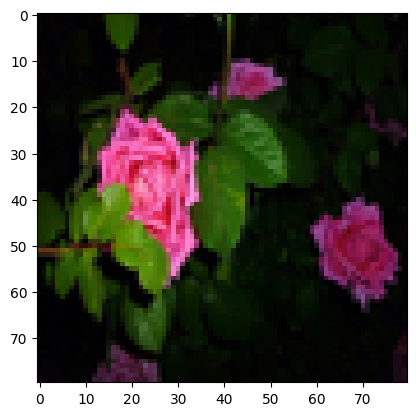

In [ ]:
plt.imshow(X_train_rgb[24])
plt.show()

In [ ]:
y_train_rgb[24]

array([0, 0, 1, 0, 0])

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_39 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.2898 - f1_score: 0.2828 - loss: 2.6201 - val_accuracy: 0.3750 - val_f1_score: 0.3660 - val_loss: 1.4675
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.5534 - f1_score: 0.5431 - loss: 1.2021 - val_accuracy: 0.3796 - val_f1_score: 0.3757 - val_loss: 1.5889
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.7582 - f1_score: 0.7554 - loss: 0.6858 - val_accuracy: 0.3264 - val_f1_score: 0.3189 - val_loss: 2.1540
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.8745 - f1_score: 0.8745 - loss: 0.4143 - val_accuracy: 0.3727 - val_f1_score: 0.3744 - val_loss: 2.4959
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.9413 - f1_score: 0.9412 - loss: 0.2176 - val_accuracy: 0.4259 - val_f1_score: 0.4236 - val_loss: 2.5334
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.9698 - f1_score: 0.9698 - loss: 0.1033 - val_accuracy: 0.3889 - va

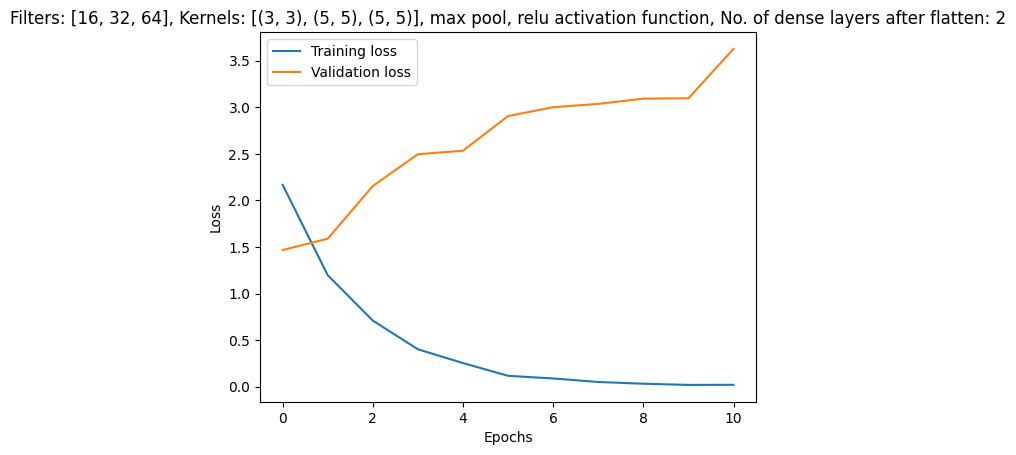

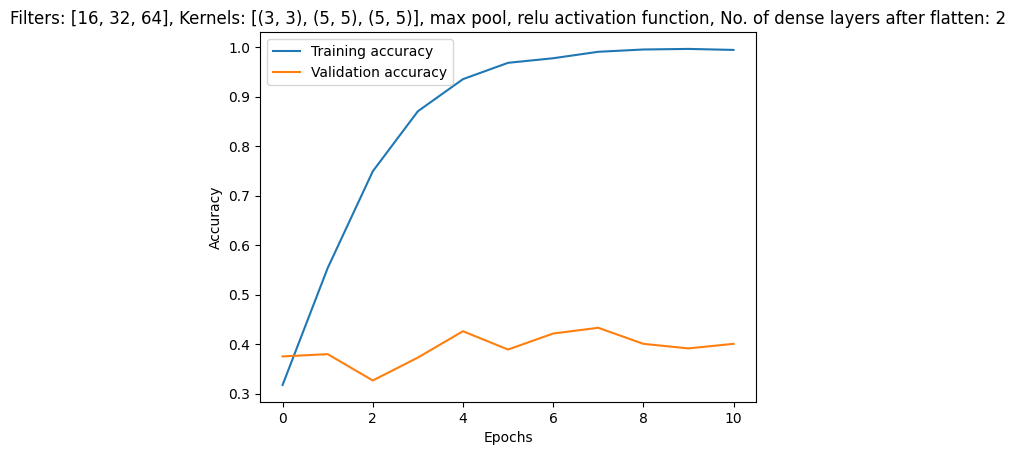

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


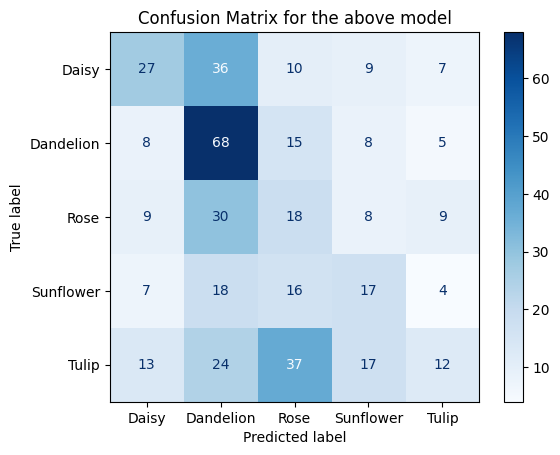

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_40 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.3686 - f1_score: 0.3658 - loss: 3.1550 - val_accuracy: 0.4421 - val_f1_score: 0.3940 - val_loss: 2.2427
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.6656 - f1_score: 0.6655 - loss: 0.9375 - val_accuracy: 0.4444 - val_f1_score: 0.4186 - val_loss: 1.9477
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.8233 - f1_score: 0.8235 - loss: 0.5042 - val_accuracy: 0.5347 - val_f1_score: 0.5313 - val_loss: 1.7583
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.9275 - f1_score: 0.9275 - loss: 0.2410 - val_accuracy: 0.5301 - val_f1_score: 0.5176 - val_loss: 1.8613
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9573 - f1_score: 0.9573 - loss: 0.1373 - val_accuracy: 0.5486 - val_f1_score: 0.5445 - val_loss: 2.2265
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.9773 - f1_score: 0.9773 - loss: 0.0895 - val_accuracy: 0.4884 - va

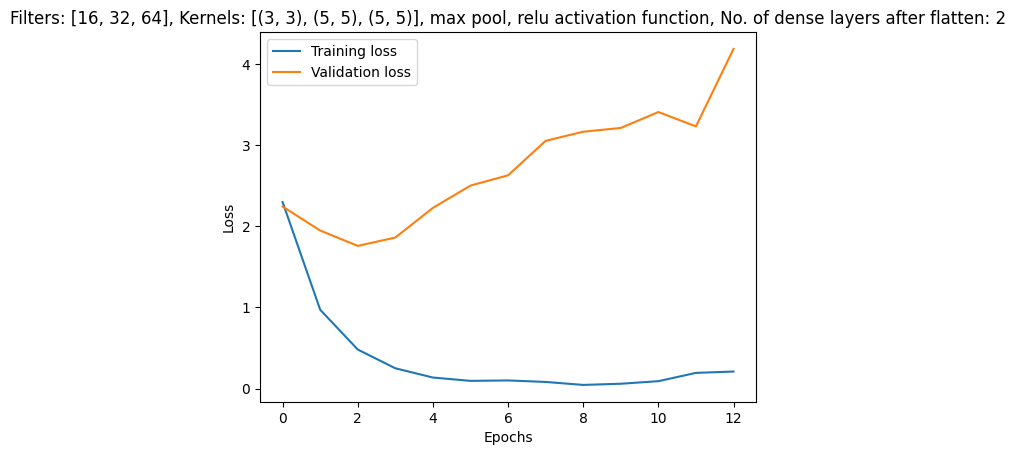

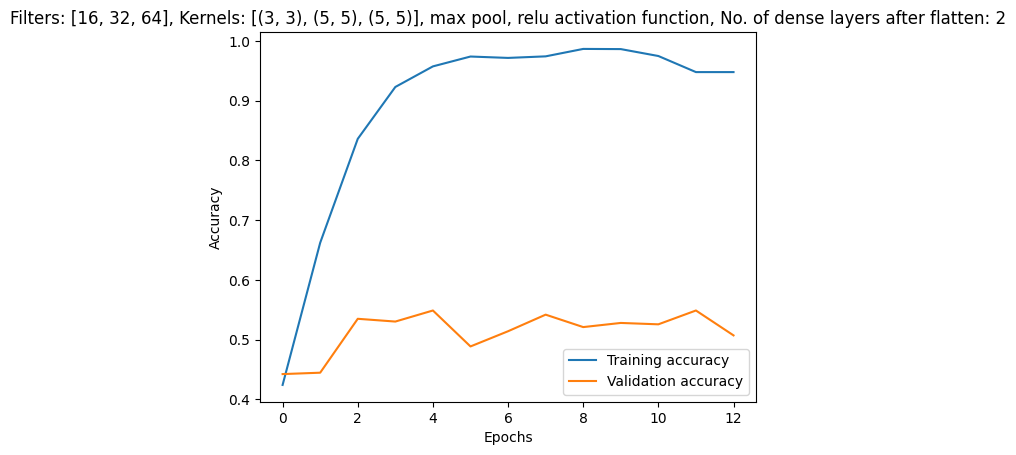

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


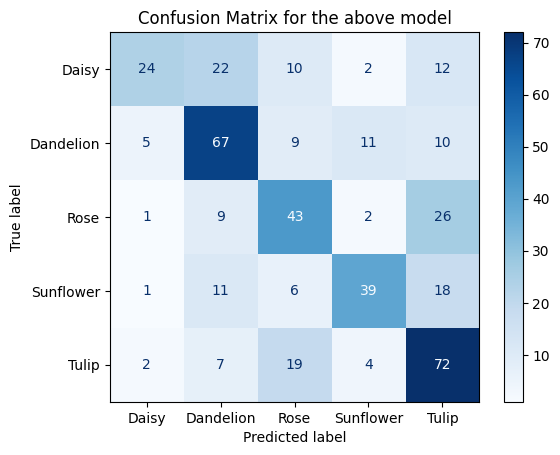

In [ ]:
result_df_7 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Batch Normalization Presence',
        'No. of Extra Conv Layers',
        'Color Mode',
        'Training Time(in seconds)'
    ]
)

filters = [16,32,64]
epochs = 20

test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=best_kernel,
      filters=filters,
      activation_func=best_activation_function,
      pool=best_pool,
      dropout_rate=best_dropout,
      num_dense_layers=best_num_dense,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs,
      add_batch_normalization=best_do_batch,
      extra_conv_layers=best_conv
      )

result_df_7.loc[len(result_df_7.index)]=[
      best_kernel,
      filters,
      best_pool,
      best_activation_function,
      best_num_dense,
      best_dropout,
      test_loss,
      test_accuracy,
      test_f1,
      best_do_batch,
      best_conv,
      'grayscale',
      train_time
  ]

test_loss,test_accuracy,test_f1,train_time,_ = train_model(
      kernels=best_kernel,
      filters=filters,
      activation_func=best_activation_function,
      pool=best_pool,
      dropout_rate=best_dropout,
      num_dense_layers=best_num_dense,
      X_train=X_train_rgb,
      y_train=y_train_rgb,
      X_test=X_test_rgb,
      y_test=y_test_rgb,
      num_epochs=epochs,
      add_batch_normalization=best_do_batch,
      extra_conv_layers=best_conv,
      is_rgb=True
      )

result_df_7.loc[len(result_df_7.index)]=[
      best_kernel,
      filters,
      best_pool,
      best_activation_function,
      best_num_dense,
      best_dropout,
      test_loss,
      test_accuracy,
      test_f1,
      best_do_batch,
      best_conv,
      'rgb',
      train_time
  ]



In [ ]:
result_df_7

Conv Kernel Size Conv Filter Size Pooling Layers  \
0  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   
1  [(3, 3), (5, 5), (5, 5)]     [16, 32, 64]            max   

  Activation Function  No. of Dense Layers after Flatten  Dropout Rate  \
0                relu                                  2           0.0   
1                relu                                  2           0.0   

   Test Loss  Test Accuracy  Test F1 Score  Batch Normalization Presence  \
0   1.591569       0.328704       0.307119                          True   
1   1.688974       0.567130       0.561695                          True   

   No. of Extra Conv Layers Color Mode  Training Time(in seconds)  
0                         0  grayscale                 206.139588  
1                         0        rgb                 250.117527

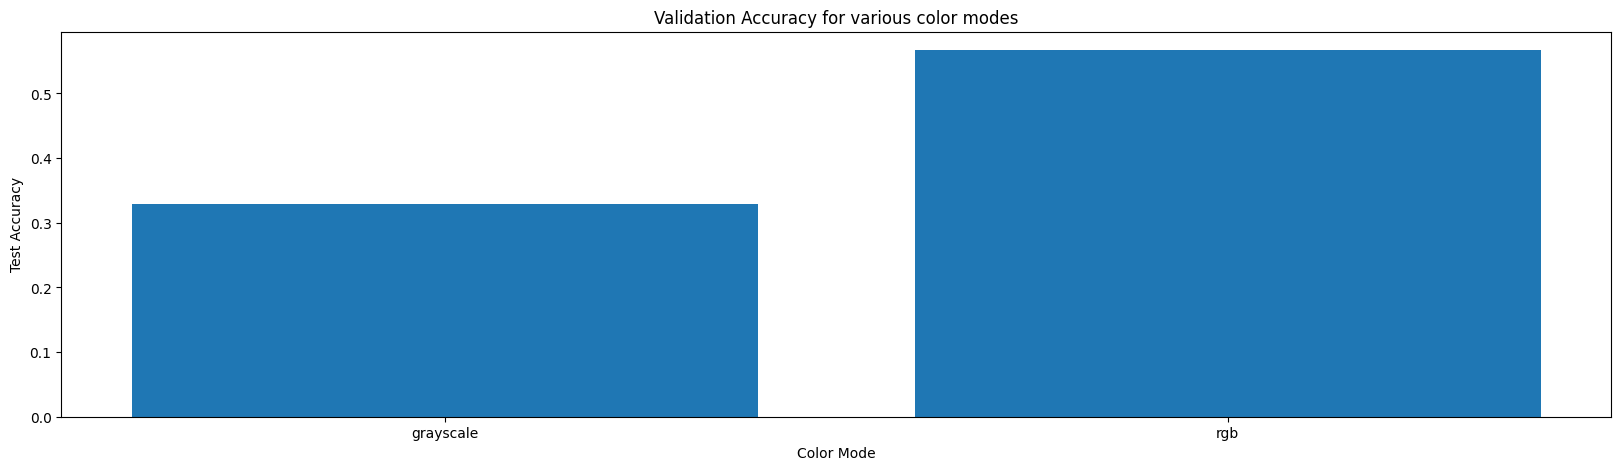

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(
    result_df_7['Color Mode'],
    result_df_7['Test Accuracy']
)

plt.ylabel('Test Accuracy')
plt.xlabel('Color Mode')
plt.title('Validation Accuracy for various color modes')
plt.show()

##### Clearly the model performs better with rgb channel images

## **Question 05**

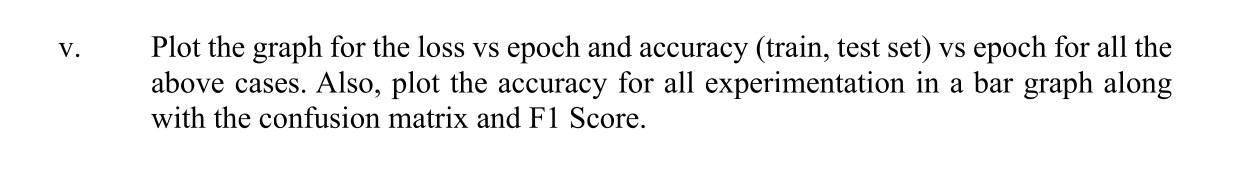

Already done in continuation of question 4

## **Question 06**
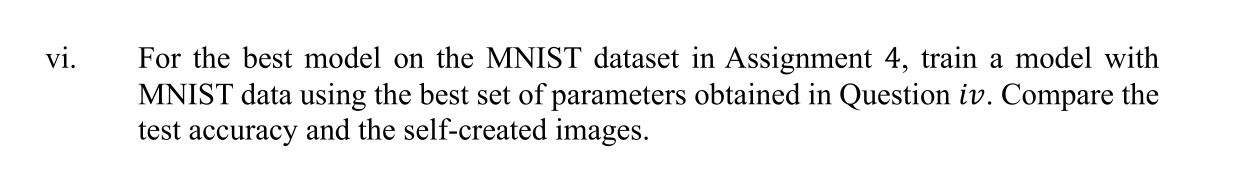

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = np.concatenate((X_train, X_test),axis=0)
y_train = np.concatenate((y_train, y_test),axis=0)
X_train.shape

(70000, 28, 28)

In [ ]:
# Training Data -> 80% , Validation Data -> 10% , Testing Data -> 10%

from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X_train, y_train, test_size=0.2, random_state=4)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=4)

In [ ]:
# Resizing to 80x80
from tensorflow.image import resize

X_train = np.reshape(X_train,(-1,28,28,1))
X_train=X_train/255
X_train = resize(X_train,(80,80))

X_val = np.reshape(X_val,(-1,28,28,1))
X_val=X_val/255
X_val = resize(X_val,(80,80))

X_test = np.reshape(X_test,(-1,28,28,1))
X_test=X_test/255
X_test = resize(X_test,(80,80))

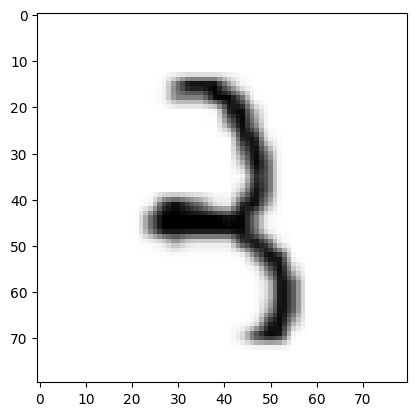

In [ ]:
plt.imshow(X_train[23],cmap='Greys')

In [ ]:
y_train[23]

3

In [ ]:
# Categorical encoding of y
y_train = pd.get_dummies(y_train,dtype='int').to_numpy()
y_val = pd.get_dummies(y_val,dtype='int').to_numpy()
y_test = pd.get_dummies(y_test,dtype='int').to_numpy()

y_train[23]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9007 - f1_score: 0.9007 - loss: 0.3188 - val_accuracy: 0.9584 - val_f1_score: 0.9585 - val_loss: 0.1457
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9731 - f1_score: 0.9731 - loss: 0.0883 - val_accuracy: 0.9664 - val_f1_score: 0.9664 - val_loss: 0.1161
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - f1_score: 0.9824 - loss: 0.0580 - val_accuracy: 0.9663 - val_f1_score: 0.9665 - val_loss: 0.1329
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9855 - f1_score: 0.9855 - loss: 0.0465 - val_accuracy: 0.9684 - val_f1_score: 0.9685 - val_loss: 0.1333
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9881 - f1_score: 0.9881 - loss: 0.0382 - val_accuracy: 0.9736 - val_f1_score: 0.9736 - val_loss: 0.1055
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9909 - f1_score: 0.9909 - loss: 0.0275 - val_accuracy: 0.9657 - val_

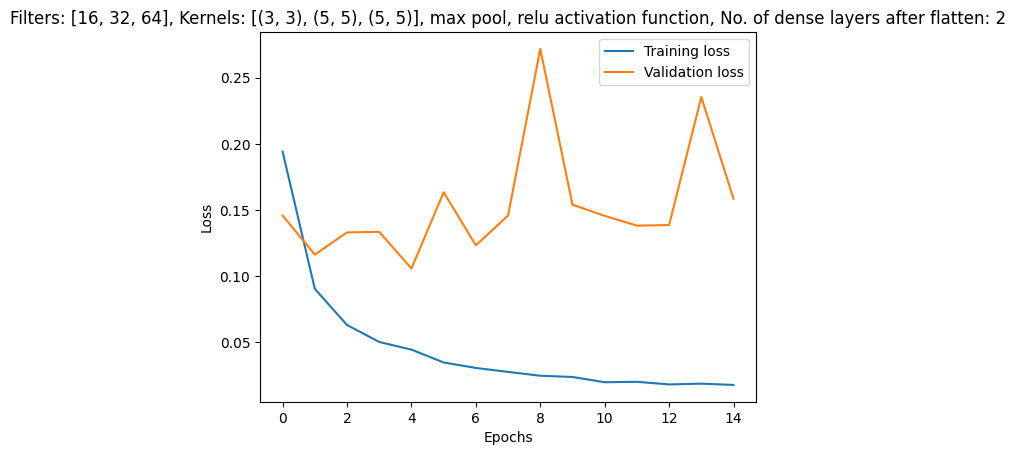

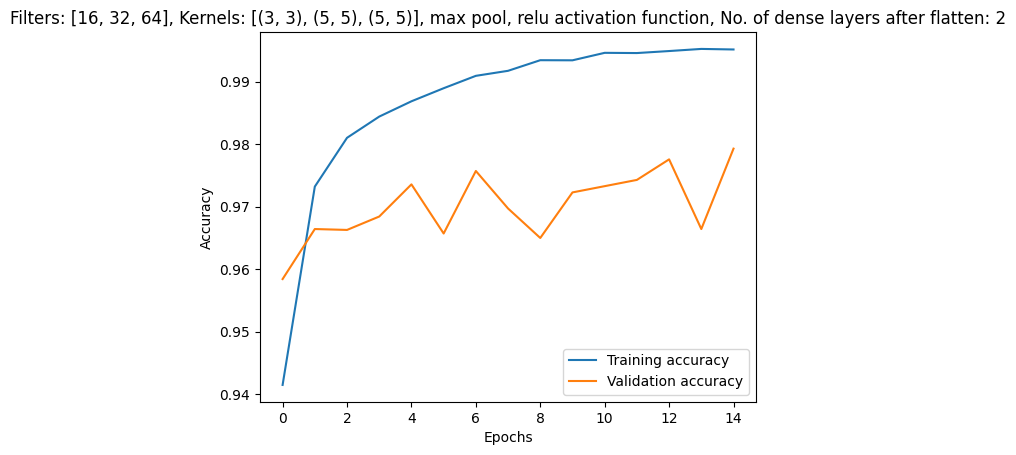

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


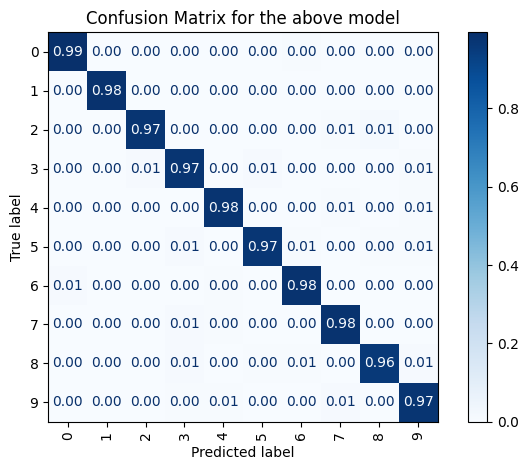

In [ ]:
result_df_8 = pd.DataFrame(
    columns=[
        'Conv Kernel Size',
        'Conv Filter Size',
        'Pooling Layers',
        'Activation Function',
        'No. of Dense Layers after Flatten',
        'Dropout Rate',
        'Test Loss',
        'Test Accuracy',
        'Test F1 Score',
        'Batch Normalization Presence',
        'No. of Extra Conv Layers',
        'Color Mode',
        'Training Time(in seconds)'
    ]
)

filters = [16,32,64]
epochs = 20

test_loss,test_accuracy,test_f1,train_time,model = train_model(
      kernels=best_kernel,
      filters=filters,
      activation_func=best_activation_function,
      pool=best_pool,
      dropout_rate=best_dropout,
      num_dense_layers=best_num_dense,
      X_train=X_train,
      y_train=y_train,
      X_test=X_test,
      y_test=y_test,
      num_epochs=epochs,
      add_batch_normalization=best_do_batch,
      extra_conv_layers=best_conv,
      is_mnist=True
      )

result_df_8.loc[len(result_df_8.index)]=[
      best_kernel,
      filters,
      best_pool,
      best_activation_function,
      best_num_dense,
      best_dropout,
      test_loss,
      test_accuracy,
      test_f1,
      best_do_batch,
      best_conv,
      'grayscale',
      train_time
  ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


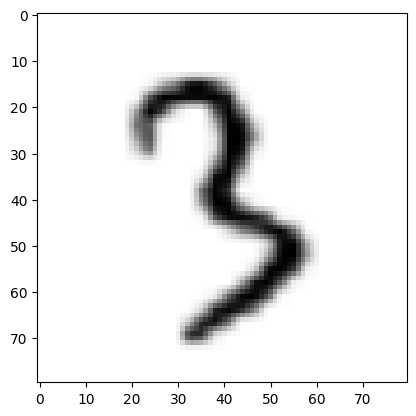

Predicted value:- 3
True value:- 3


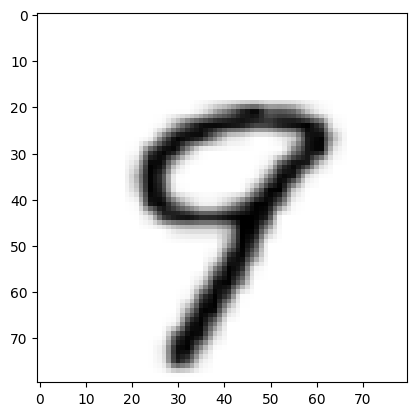

Predicted value:- 9
True value:- 9


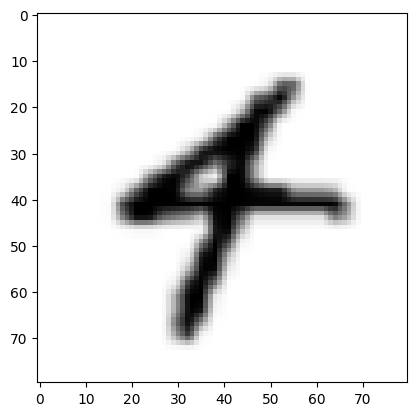

Predicted value:- 4
True value:- 4


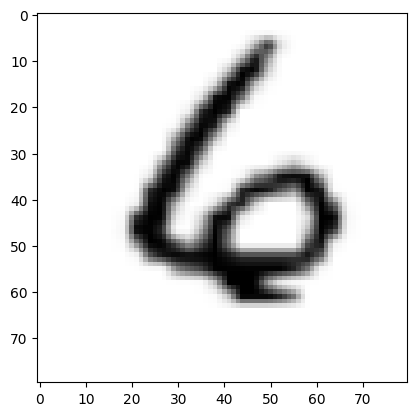

Predicted value:- 6
True value:- 6


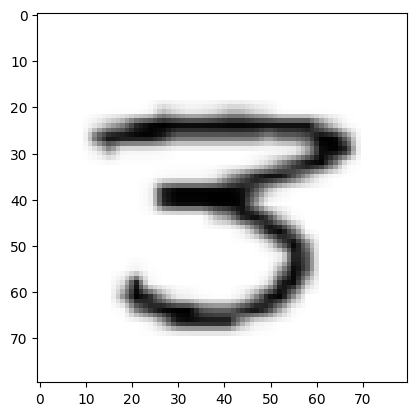

Predicted value:- 3
True value:- 3


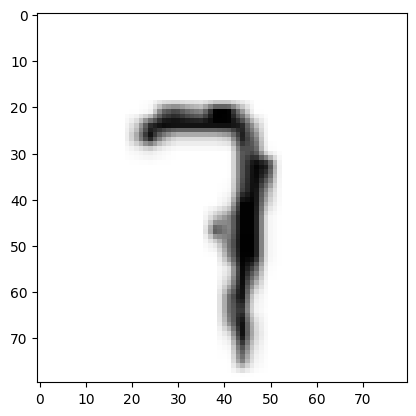

Predicted value:- 7
True value:- 7


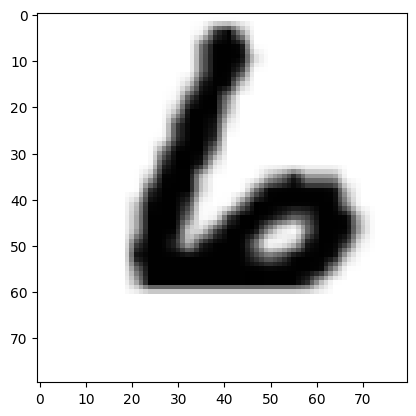

Predicted value:- 6
True value:- 6


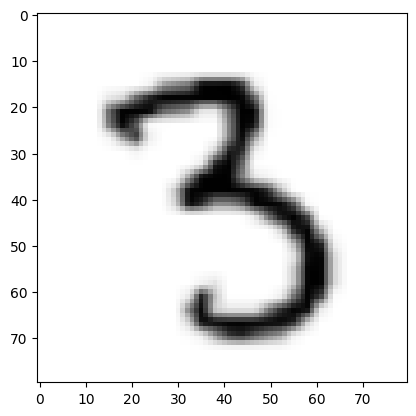

Predicted value:- 3
True value:- 3


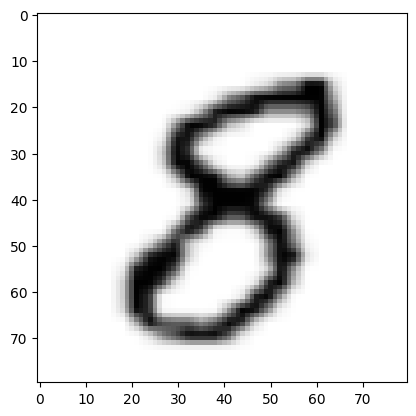

Predicted value:- 8
True value:- 8


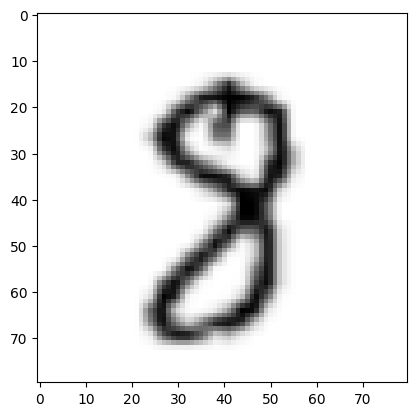

Predicted value:- 8
True value:- 8


In [ ]:
import random

random_indices = random.sample(range(0,len(X_test)),10)

img_predict = np.array([X_test[ind] for ind in random_indices])
true_label = np.array([y_test[ind] for ind in random_indices])

cat_pred = model.predict(img_predict)

for img,cat_pred,true_val in zip(img_predict,cat_pred,true_label):
  plt.imshow(img,cmap="Greys")
  plt.show()
  prediction=np.argmax(cat_pred)
  print(f"Predicted value:- {prediction}")
  print(f"True value:- {np.argmax(true_val)}")

As we can see there is 100% accuracy achieved here, which was not the case for the earlier assignment's ANN model